In [383]:
## Imporitng required Python libraries

# For Data Analysis and Data Wrangling
import numpy as np
import pandas as pd

# For visulaization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

# Statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [384]:
# Suppress Warnings

import warnings 
warnings.filterwarnings('ignore')

In [385]:
# Reading data
from tkinter import *
from tkinter import filedialog
filepath = filedialog.askopenfilename()
lead = pd.read_csv(filepath)

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [386]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [387]:
# Dimensions of the data in hand

print("Dimesnion of the Data: ", lead.shape)
print("Size of the Data:      ", lead.size)

Dimesnion of the Data:  (9240, 37)
Size of the Data:       341880


In [388]:
# Summary Statistics for each numerical column

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [389]:
# Looking for duplicate values 

print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


There is no duplicate entries here. So, moving further to next analysis.

In [390]:
# Getting to know each of the column

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Here, we can see that there are lots of missing values. Let's deal with the missing values first.
Also, by examining the data, we can see there's a large no. of "Select" filled, which may be due to the fields not being filled by the person.

In [391]:
lead = lead.replace("Select", np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


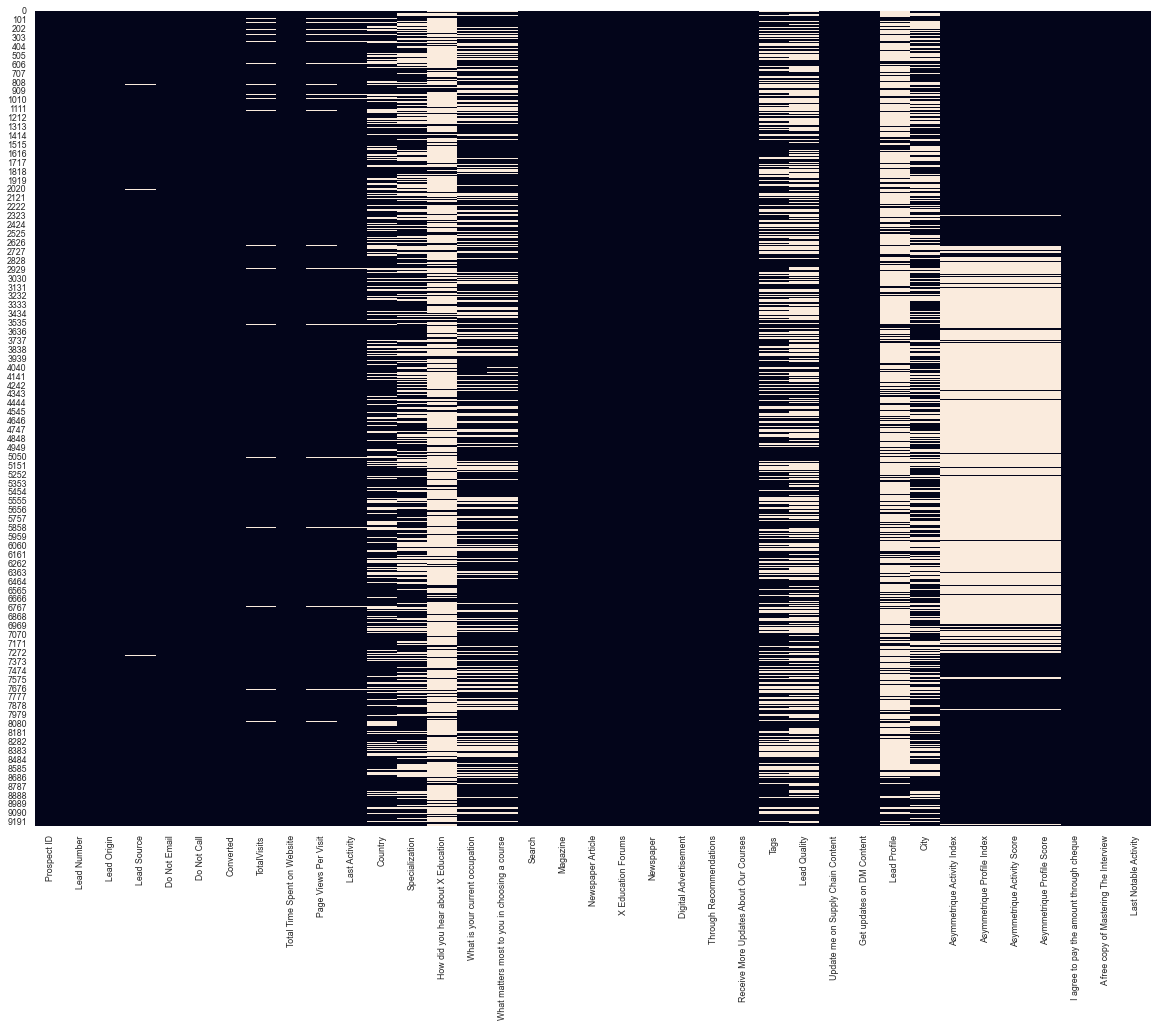

In [392]:
plt.figure(figsize = (20,15))
sns.heatmap(lead.isnull(), cbar = False)
plt.show()

Now let's look at the quantity of the null values present in each column of our data.

In [393]:
null_percentage = pd.DataFrame( round(lead.isnull().sum()*100/lead.shape[0], 2)).reset_index() 
null_percentage.columns = ["Column Names", "Null Values Percentage"]

null_values = pd.DataFrame(lead.isnull().sum()).reset_index()
null_values.columns = ["Column Names", "Null Values"]

null_lead = pd.merge(null_values, null_percentage, on = "Column Names")
null_lead.sort_values("Null Values", ascending = False)

,Column Names,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


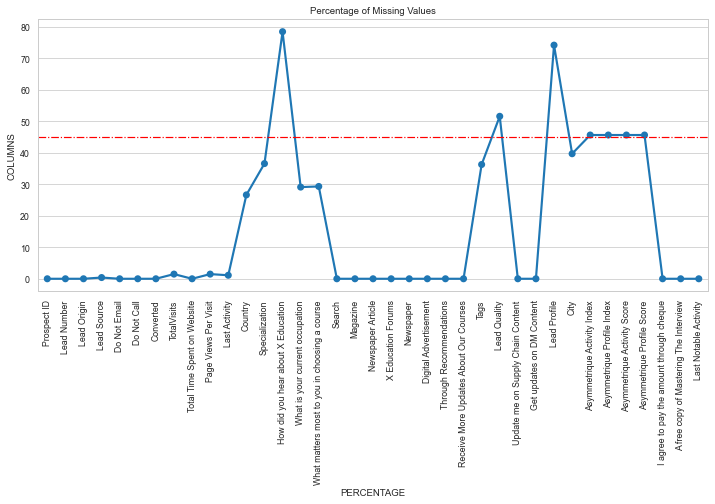

In [394]:
# Plotting Null Values
null_lead_ = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()

plt.figure(figsize=(12,5))
ax = sns.pointplot("index",0,data=null_lead_)
plt.xticks(rotation = 90)
ax.axhline(45, ls = "-.", color = "red")
plt.title("Percentage of Missing Values")
plt.xlabel("PERCENTAGE")
plt.ylabel("COLUMNS")
plt.show()

Here, the dotted-dashed red line is our line after which we can't tolearte null values (I have chosen to remove all such columns that contains more than 45% of null values)

In [395]:
cols_to_drop = null_lead[ null_lead.iloc[:,2] > 45 ].iloc[:,0].tolist()   # These are the columns that contains more than 45% of the missing values.
cols_to_drop.extend(["Prospect ID", "Lead Number", "Tags", "Last Notable Activity"])   # These are the columns that are irrelevant to our study

cols_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Prospect ID',
 'Lead Number',
 'Tags',
 'Last Notable Activity']

In [396]:
# Dropping unnecessary columns

lead.drop(columns = cols_to_drop, inplace = True)

In [397]:
lead.shape   # to double-check if the variables are omitted or not.

(9240, 26)

Now, checking if any rows have substantial amount (more than 50%) of null values

In [398]:
print("No. of rows in the data having more than 50% of null values : {}".format(sum( lead.isnull().sum(axis = 1) * 100 / lead.shape[1] > 50 )))

No. of rows in the data having more than 50% of null values : 0


# Treatment of Missing Values

Since, we have both numerical and categorical features here. So, treatement in both will be dratically different.

In [399]:
# Separating Categorical and Numerical Values

categorical_columns = lead.select_dtypes(exclude=['int', 'float']).columns
numerical_columns = lead.select_dtypes(include=['int', 'float']).columns

print(categorical_columns)
print(numerical_columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


# 1- Categorical Null Value Treatment

In [400]:
def categorical_info(df, cat_col):
    df_result = pd.DataFrame(columns = ["columns", "values", "unique_values", "null_values", "null_percent"])
    
    df_temp = pd.DataFrame()
    
    for value in cat_col:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum() * 100 / len(df)).round(1)
        
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending = False, inplace = True)
    df_result.set_index("columns" ,inplace = True)
    
    return df_result

In [401]:
df_categorical = categorical_info(lead, categorical_columns)
df_categorical

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


Here, there are five columns having only one category which means they contain no imformation regarding the lead scoring. Hence, we can drop these features from the data.

In [402]:
cols_to_drop = df_categorical[ df_categorical["unique_values"] == 1 ].index.tolist()

In [403]:
# Dropping the above columns
lead.drop(columns = cols_to_drop, inplace = True)

In [404]:
lead.shape   # Double-checking if the changes occured or not

(9240, 21)

Checking the new null value and column details for Categorical columns

In [405]:
categorical_columns = lead.select_dtypes(exclude=['int', 'float']).columns
new_cat = categorical_info(lead, categorical_columns)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


## Col: City (Missing: 39.7%)

In [406]:
lead["City"].value_counts(normalize = True) * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [407]:
# Examining City and Country to see the possible connection
pd.set_option('display.max_rows', 100)

lead.groupby(["Country", "City"])["City"].count()

Country               City                       
Australia             Mumbai                            6
                      Other Cities                      2
                      Thane & Outskirts                 3
Bahrain               Mumbai                            1
                      Other Cities                      2
                      Other Cities of Maharashtra       1
                      Thane & Outskirts                 2
                      Tier II Cities                    1
Bangladesh            Other Cities                      2
Belgium               Mumbai                            1
                      Thane & Outskirts                 1
Canada                Mumbai                            3
China                 Mumbai                            1
Denmark               Other Cities                      1
France                Other Cities                      2
                      Other Cities of Maharashtra       2
                      

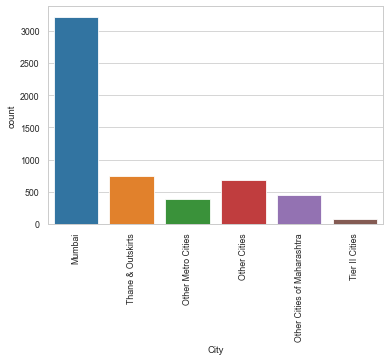

In [408]:
ax = sns.countplot(lead['City'])
plt.xticks(rotation = 90)
plt.show()

As there is almost 40% unknown values, we cannot impute with mode as it is make the whole data skewed. Also, X-Education is online teaching platform. The city information will not be much useful as potential students can available any courses online despite their city. We will drop the column from analysis.

In [409]:
lead.drop(columns = "City", inplace = True)
print(lead.shape)

(9240, 20)


## Col: Specialization (Missing: 36.6%)

In [410]:
lead["Specialization"].value_counts(normalize = True) * 100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

Let's visualize this:

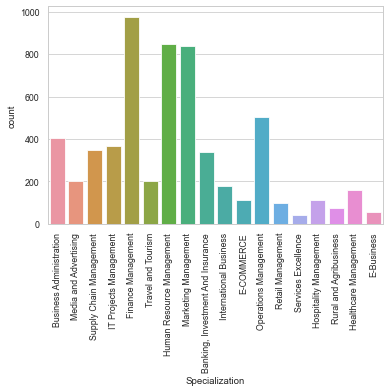

In [411]:
ax = sns.countplot(lead["Specialization"])
plt.xticks(rotation = 90)
plt.show()

Let's just replace the null values by "others" as there may be persons who don't have any specialization.

In [412]:
lead["Specialization"] = lead["Specialization"].replace(np.nan, "Others")

In [413]:
sum(lead["Specialization"].isnull())

0

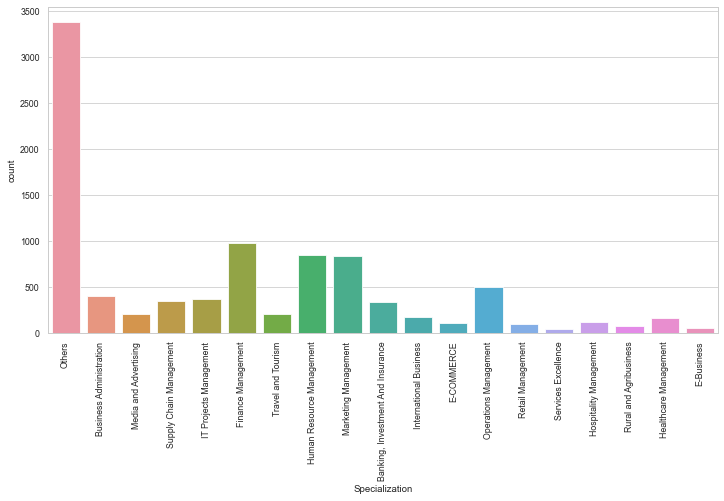

In [414]:
plt.figure(figsize = (12,6))
ax = sns.countplot(lead["Specialization"])
plt.xticks(rotation = 90)
plt.show()

## Col: What matters most to you in choosing a course (Missing: 29.3%)

In [415]:
lead["What matters most to you in choosing a course"].value_counts(normalize = True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

As the data is very skewed there is not much we can infer from this column. Imputing missing values may lead to high bias here.

In [416]:
lead.drop(columns = "What matters most to you in choosing a course", inplace = True)

In [417]:
sum(lead["Specialization"].isnull())

0

## Col: What is your current occupation (Missing: 29.1%)

In [418]:
lead["What is your current occupation"].value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

We can make a completely new category for the null values as "Unknown"

In [419]:
lead["What is your current occupation"] = lead["What is your current occupation"].replace(np.nan, "Unknown")

In [420]:
sum(lead["What is your current occupation"].isnull())

0

In [421]:
lead["What is your current occupation"].value_counts(normalize = True) * 100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

## Col: Country (Missing: 26.6%)

In [422]:
lead["Country"].value_counts(normalize = True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

Here, the data is also highly skewed and as it is a online education platform, it might not affect much if we drop this feature from the data.

In [423]:
lead.drop(columns = "Country", inplace = True)
print(lead.shape)

(9240, 18)


## Col: Last Activity (Missing: 1.1%)

In [424]:
lead["Last Activity"].value_counts(normalize = True) * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

Since, only a portion of the data is missing. We can use mode to impute this.

In [425]:
lead["Last Activity"] = lead["Last Activity"].replace(np.nan, "Email Opened")

In [426]:
sum( lead["Last Activity"].isnull() )

0

In [427]:
lead["Last Activity"].value_counts(normalize = True) * 100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

## Col: Lead Source (Missing: 0.4%)

In [428]:
lead["Lead Source"].value_counts(normalize = True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

Let's impute the missing values with mode of the data.

In [429]:
lead["Lead Source"] = lead["Lead Source"].replace(np.nan, "Google")

In [430]:
sum( lead["Lead Source"].isnull() )

0

So, in this way, we are done with dealing of missing values in case of categorical features

# 2- Numerical Null Value Treatment

In [431]:
def numerical_info(df, cat_col):
    df_result = pd.DataFrame(columns = ["columns", "null_values", "null_percent"])
    
    df_temp = pd.DataFrame()
    
    for value in cat_col:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum() * 100 / len(df)).round(1)
        
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending = False, inplace = True)
    df_result.set_index("columns" ,inplace = True)
    
    return df_result

In [432]:
df_numerical = numerical_info(lead, numerical_columns)
df_numerical

,null_values,null_percent
columns,,
TotalVisits,137,1.5
Page Views Per Visit,137,1.5
Converted,0,0.0
Total Time Spent on Website,0,0.0


## Col: TotalVisits (Missing: 1.5%)

Let's look at the summary statistics of the column

In [433]:
lead["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

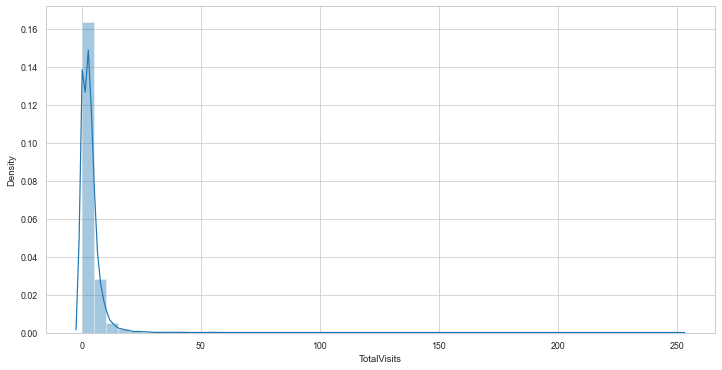

In [434]:
plt.figure(figsize = (12, 6))
sns.distplot(lead["TotalVisits"])
plt.show()

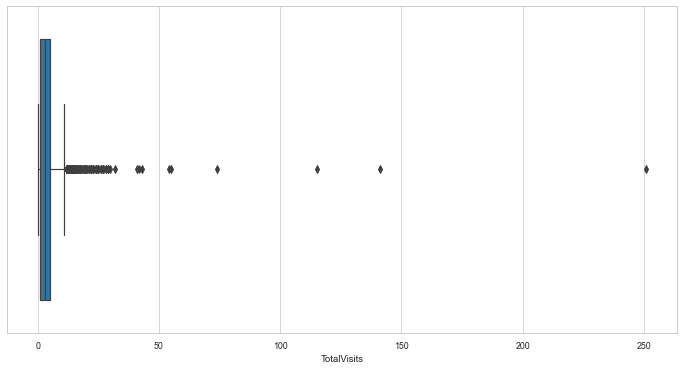

In [435]:
plt.figure(figsize = (12, 6))
sns.boxplot(lead["TotalVisits"])
plt.show()

Here, the data is highly skewed. So, using median imputation method to fill up the missing values.

In [436]:
lead["TotalVisits"].replace(np.nan, lead["TotalVisits"].median(), inplace = True)

In [437]:
lead["TotalVisits"].isnull().sum()

0

Again, let's look at the distribution of the data.

In [438]:
lead["TotalVisits"].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Some minute/negligible changes can be seen in the summary statistics. Let's plot the data to verify the finding.

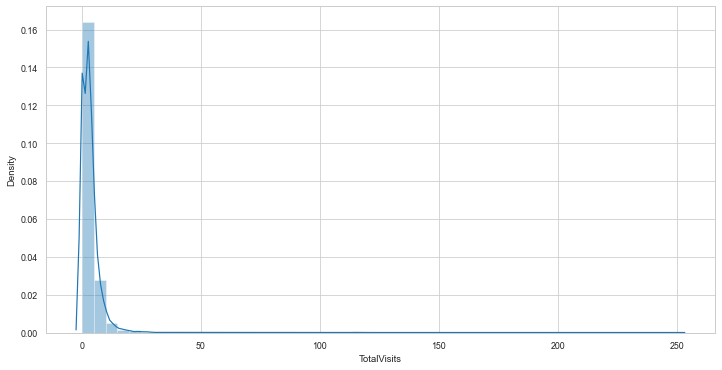

In [439]:
plt.figure(figsize = (12, 6))
sns.distplot(lead["TotalVisits"])
plt.show()

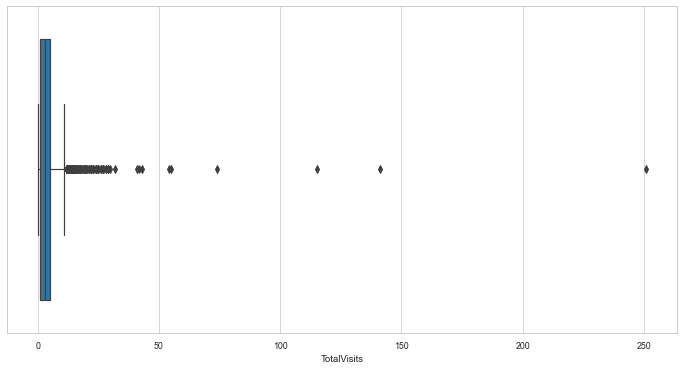

In [440]:
plt.figure(figsize = (12, 6))
sns.boxplot(lead["TotalVisits"])
plt.show()

## Col: Pages Views Per Visit (Missing: 1.5%)

Let's look at the summary statistics of the column

In [441]:
lead["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

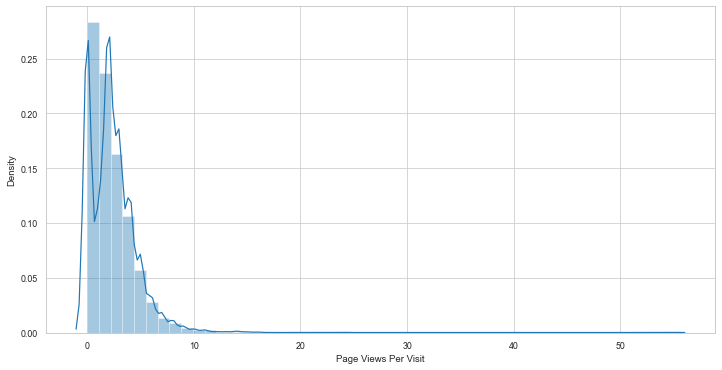

In [442]:
plt.figure(figsize = (12, 6))
sns.distplot(lead["Page Views Per Visit"])
plt.show()

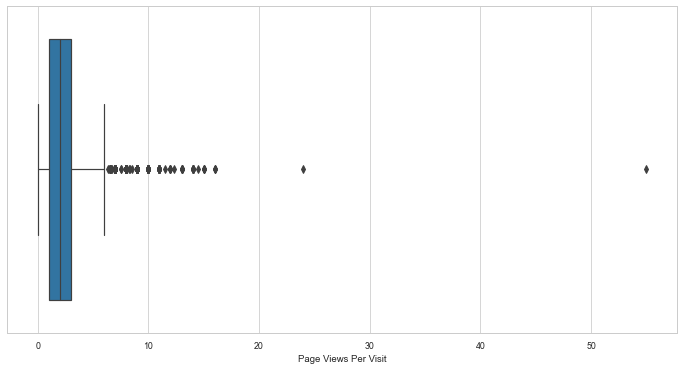

In [443]:
plt.figure(figsize = (12, 6))
sns.boxplot(lead["Page Views Per Visit"])
plt.show()

This data is again highly positively skewed data. So, we are going to use median imputation.

In [444]:
lead["Page Views Per Visit"].replace(np.nan, lead["Page Views Per Visit"].median(), inplace = True)

In [445]:
lead["Page Views Per Visit"].isnull().sum()

0

Looking at the distribution of the data again.

In [446]:
lead["Page Views Per Visit"].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Very minute changes can be seen in the summary statistic. Let's verify it by plotting again the same graph.

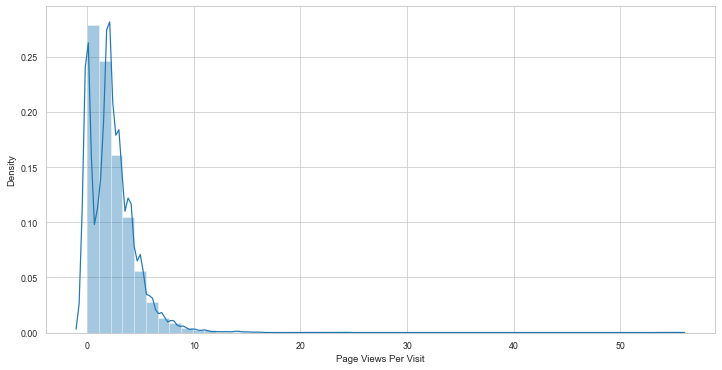

In [447]:
plt.figure(figsize = (12, 6))
sns.distplot(lead["Page Views Per Visit"])
plt.show()

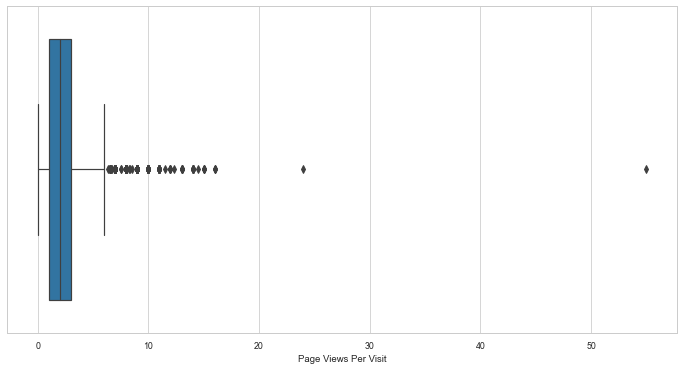

In [448]:
plt.figure(figsize = (12, 6))
sns.boxplot(lead["Page Views Per Visit"])
plt.show()

So, we are done with all the imputations and dropping of featuress based on the analysis done in the section "Treatment of Missing Values". 
Let's again verify if we have any missing values in the data or not.

In [449]:
lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

# EDA

## - Data Imbalance

In [450]:
converted = lead["Converted"].value_counts().sort_values(ascending = False).to_frame().reset_index()
converted.columns = ["Unique Values", "Counts"]
converted

,Unique Values,Counts
0,0,5679
1,1,3561


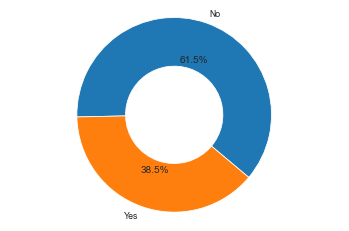

In [451]:
fig, ax = plt.subplots()
ax.pie(converted["Counts"], labels = ["No", "Yes"], wedgeprops = dict(width = 0.5), startangle = -40, autopct = "%1.1f%%")
ax.axis("equal")

plt.show()

It seems to be a balanced data.

## Graphical Visualizations

In [452]:
lead.columns 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [453]:
# Changing the long names to shorthand for ease of use

lead.rename(columns = {"What is your current occupation": "Occupation",
                      "Through Recommendations": "Recommendations",
                      "A free copy of Mastering The Interview": "Free Copy"},
           inplace = True)

In [454]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendations', 'Free Copy'],
      dtype='object')

### Univariate Analysis (CATEGORICAL)

In [455]:
# Getting the names of the features that are categorical in nature.

categorical_columns = lead.select_dtypes(exclude=['int', 'float']).columns
print( categorical_columns )

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendations', 'Free Copy'],
      dtype='object')


In [456]:
# Defining a fn for univariate categorical analysis

def univariate_categorical(col):
    # DataFrame for all the relevant info
    df_val = lead[col].value_counts().to_frame().reset_index()
    df_val.columns = [col, "Total Leads"]
    df_val["% Values"] = df_val["Total Leads"] * 100 / df_val["Total Leads"].sum()
    df_ = lead.groupby(col)["Converted"].sum().reset_index()
    df_val = pd.merge(df_val, df_, on = col)
    df_val["Not Converted"] = df_val["Total Leads"] - df_val["Converted"]
    df_val["Converted %"] = df_val["Converted"] * 100 / (df_val["Converted"] + df_val["Not Converted"])
    df_val.sort_values(by = "Converted %", inplace = True, ascending = False)
    print( df_val )

    # First Graph
    plt.figure(figsize = (12, 6))
    plt.subplots_adjust(wspace = 0.5)

    plt.subplot(1, 2, 1)
    sns.countplot(x = col, hue = "Converted", data = lead)
    plt.legend(title = "", labels = ["Not Converted", "Converted"])
    plt.xticks(rotation = 90)

    # Second Graph
    plt.subplot(1, 2, 2)
    sns.barplot(x = col, y = "Converted %", data = df_val)
    plt.xticks(rotation = 90)

    plt.show()

#### Col: Lead Origin

               Lead Origin  Total Leads   % Values  Converted  Not Converted  \
4           Quick Add Form            1   0.010823          1              0   
2            Lead Add Form          718   7.770563        664             54   
0  Landing Page Submission         4886  52.878788       1768           3118   
1                      API         3580  38.744589       1115           2465   
3              Lead Import           55   0.595238         13             42   

   Converted %  
4   100.000000  
2    92.479109  
0    36.185018  
1    31.145251  
3    23.636364  


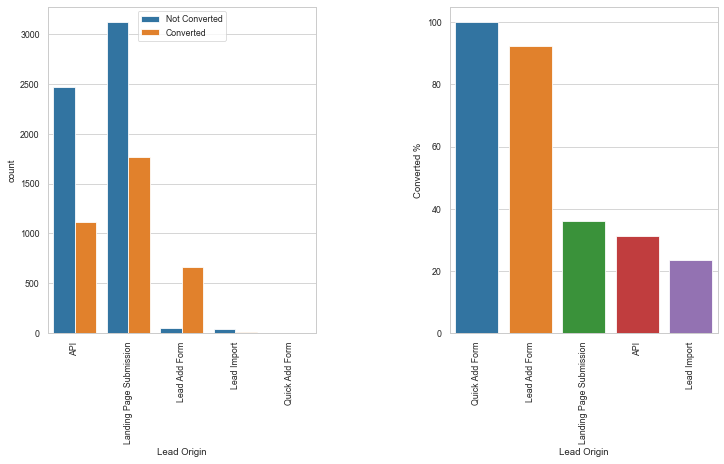

In [457]:
univariate_categorical("Lead Origin")

- Most leads originated from Landing Page Submission (about 53%), followed by API (about 39%) and then Lead Add Form (about 8%).
- Most leads conversion rate is from Quick Add Form but it is less meaningful as it had only 1 lead and that accounts for only 0.0108% of the total leads. Next highest conversion is from **Lead Add Form** (~92%), followed by **Landing Page Submission** (~36%) and then **API** (~31%).
- **Lead Import** conversion is least (~23%).

**To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submissions origin and generate more leads form Lead Add Form.**

#### Col: Lead Source

          Lead Source  Total Leads   % Values  Converted  Not Converted  \
20             NC_EDM            1   0.010823          1              0   
18            WeLearn            1   0.010823          1              0   
13          Live Chat            2   0.021645          2              0   
5    Welingak Website          142   1.536797        140              2   
4           Reference          534   5.779221        490             44   
10         Click2call            4   0.043290          3              1   
12       Social Media            2   0.021645          1              1   
0              Google         2904  31.428571       1176           1728   
3      Organic Search         1154  12.489177        436            718   
1      Direct Traffic         2543  27.521645        818           1725   
2          Olark Chat         1755  18.993506        448           1307   
6      Referral Sites          125   1.352814         31             94   
7            Facebook    

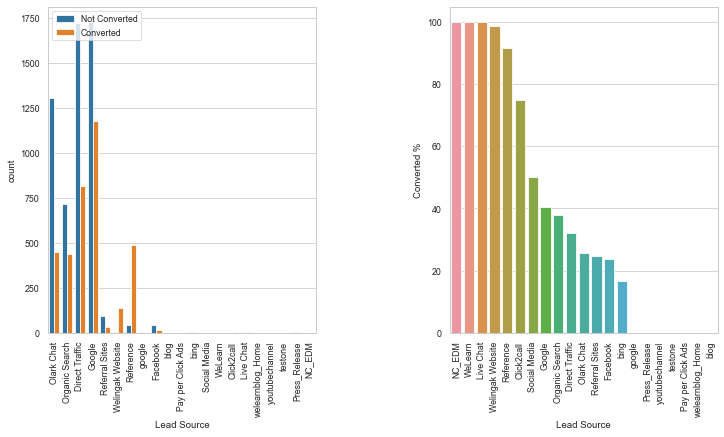

In [458]:
univariate_categorical("Lead Source")

Let's visualize it better by clubbing all the small leads by "Other Sources". Also we can see there are two googles : "google" and "Google", let's club this.

In [459]:
lead["Lead Source"].replace("google", "Google", inplace = True)

In [460]:
lead["Lead Source"].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], "Other Sources", inplace = True)

        Lead Source  Total Leads   % Values  Converted  Not Converted  \
5  Welingak Website          142   1.536797        140              2   
4         Reference          534   5.779221        490             44   
0            Google         2909  31.482684       1176           1733   
8     Other Sources           23   0.248918          9             14   
3    Organic Search         1154  12.489177        436            718   
1    Direct Traffic         2543  27.521645        818           1725   
2        Olark Chat         1755  18.993506        448           1307   
6    Referral Sites          125   1.352814         31             94   
7          Facebook           55   0.595238         13             42   

   Converted %  
5    98.591549  
4    91.760300  
0    40.426263  
8    39.130435  
3    37.781629  
1    32.166732  
2    25.527066  
6    24.800000  
7    23.636364  


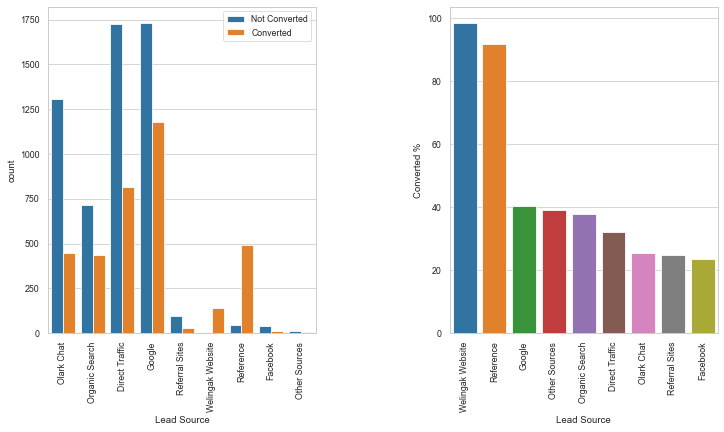

In [461]:
univariate_categorical("Lead Source")

- The Lead Source with most leads are **Google**(~31%), followed by **Direct Traffic**(~28%) and then **Olark Chat**(~19%).
- The most lead conversion are from **Wellingak Website**(~99%), followed by **References**(~92%) and **Google**(~40%).
- The least conversion rate is from **Facebook**(~24%).

**To increase the lead count, steps should be taken to increase the Reference**

#### Col: Do Not Email

  Do Not Email  Total Leads   % Values  Converted  Not Converted  Converted %
0           No         8506  92.056277       3443           5063    40.477310
1          Yes          734   7.943723        118            616    16.076294


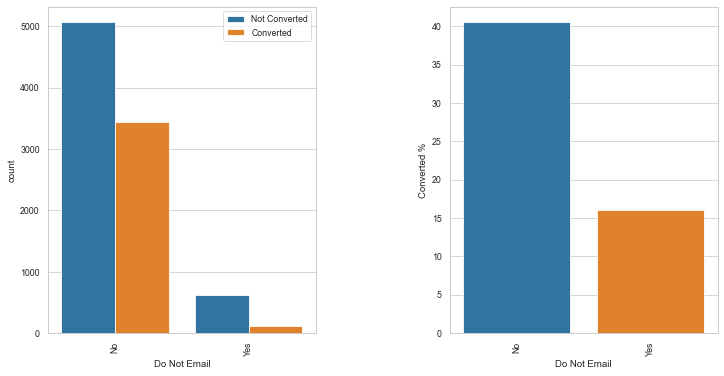

In [462]:
univariate_categorical("Do Not Email")

- Majority of the people are ok with receiving email (~92%).
- These people show high conversion rate(~40%) as compared to those who don't want to receive mails(~16%).

#### Col: Do Not Call

  Do Not Call  Total Leads   % Values  Converted  Not Converted  Converted %
1         Yes            2   0.021645          2              0   100.000000
0          No         9238  99.978355       3559           5679    38.525655


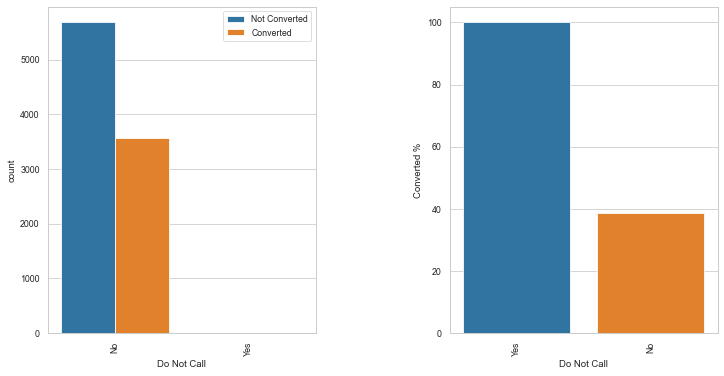

In [463]:
univariate_categorical("Do Not Call")

- Almost all the people are okay with the calls
- These people shows 100% conversion rate.

**Thus, in order to maintain the number of leads, calls are preferred**

#### Col: Last Activity

                   Last Activity  Total Leads   % Values  Converted  \
16        Resubscribed to emails            1   0.010823          1   
14             Email Marked Spam            2   0.021645          2   
13                Email Received            2   0.021645          2   
11            Approached upfront            9   0.097403          9   
10      Had a Phone Conversation           30   0.324675         22   
1                       SMS Sent         2745  29.707792       1727   
0                   Email Opened         3540  38.311688       1334   
8                    Unreachable           93   1.006494         31   
6             Email Link Clicked          267   2.889610         73   
9                   Unsubscribed           61   0.660173         16   
7      Form Submitted on Website          116   1.255411         28   
3        Page Visited on Website          640   6.926407        151   
12  View in browser link Clicked            6   0.064935          1   
4     

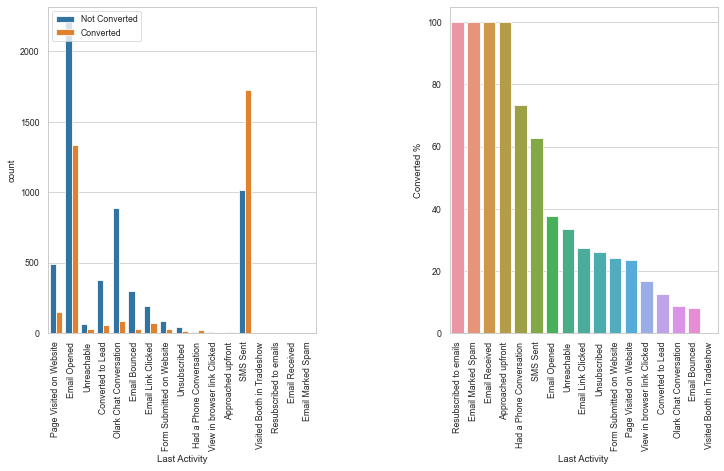

In [464]:
univariate_categorical("Last Activity")

Let's visualize it better by clubbing all the small leads by "Other Activity".

In [465]:
lead["Last Activity"].replace(["Resubscribed to emails", "Email Marked Spam", "Email Received", "Approached upfront", "Had a Phone Conversation", "View in browser link Clicked", "Visited Booth in Tradeshow"], "Other Activity", inplace = True)

                Last Activity  Total Leads   % Values  Converted  \
10             Other Activity           51   0.551948         37   
1                    SMS Sent         2745  29.707792       1727   
0                Email Opened         3540  38.311688       1334   
8                 Unreachable           93   1.006494         31   
6          Email Link Clicked          267   2.889610         73   
9                Unsubscribed           61   0.660173         16   
7   Form Submitted on Website          116   1.255411         28   
3     Page Visited on Website          640   6.926407        151   
4           Converted to Lead          428   4.632035         54   
2     Olark Chat Conversation          973  10.530303         84   
5               Email Bounced          326   3.528139         26   

    Not Converted  Converted %  
10             14    72.549020  
1            1018    62.914390  
0            2206    37.683616  
8              62    33.333333  
6             194 

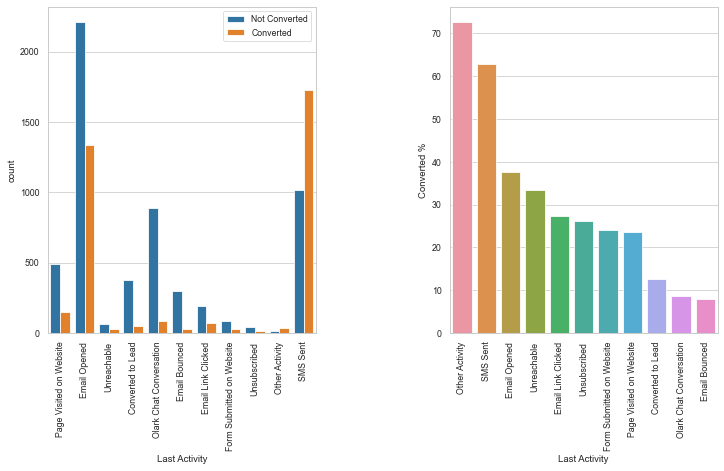

In [466]:
univariate_categorical("Last Activity")

- The most lead counts are from **Email Opened** (~38%), followed by **SMS Sent**(~30%) and **Olark Chat Conversation**(~11%).
- The most conversion rate are from **Other Activity** (~73%), followed by **SMS Sent** (~63%) and **Email Opened**(~38%).
- The least conversion rate is from **Email Bounced**

#### Col: Specialization

                       Specialization  Total Leads   % Values  Converted  \
12              Healthcare Management          159   1.720779         79   
8   Banking, Investment And Insurance          338   3.658009        167   
3                Marketing Management          838   9.069264        408   
4               Operations Management          503   5.443723        238   
2           Human Resource Management          848   9.177489        388   
1                  Finance Management          976  10.562771        436   
5             Business Administration          403   4.361472        179   
7             Supply Chain Management          349   3.777056        151   
16             Rural and Agribusiness           73   0.790043         31   
13             Hospitality Management          114   1.233766         48   
10              Media and Advertising          203   2.196970         85   
6              IT Projects Management          366   3.961039        140   
17          

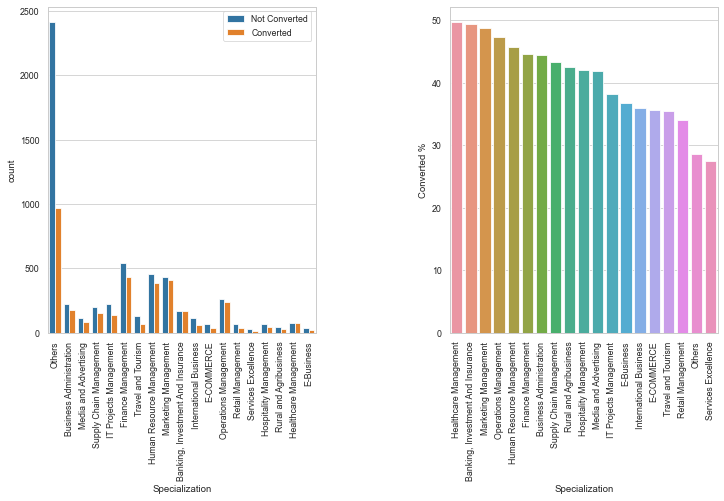

In [467]:
univariate_categorical("Specialization")

- Most of the leads have not mentioned a specialization and around 28% of those converted.
- About half of the all specializtion have more than 45% of conversion rate. The least conversion rate is from **Service Excellence** (27.5%)

#### Col: Occupation

             Occupation  Total Leads   % Values  Converted  Not Converted  \
5             Housewife           10   0.108225         10              0   
2  Working Professional          706   7.640693        647             59   
4                 Other           16   0.173160         10              6   
6           Businessman            8   0.086580          5              3   
0            Unemployed         5600  60.606061       2441           3159   
3               Student          210   2.272727         78            132   
1               Unknown         2690  29.112554        370           2320   

   Converted %  
5   100.000000  
2    91.643059  
4    62.500000  
6    62.500000  
0    43.589286  
3    37.142857  
1    13.754647  


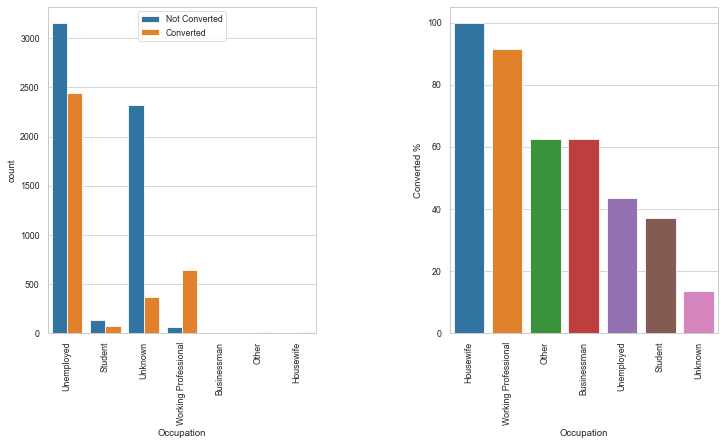

In [468]:
univariate_categorical("Occupation")

- The most leads are from **Unemployed**(~61%), followed by **Unknown**(~29%) and **Working Professional**(~8%).
- The highest conversion rates are from **Housewife** (100%) (they only account for 0.11% of the total leads), followed **Working Professionals**(~91%) and **Other**(~63%). The least is from **Unknown** (~13%).

**To increase the number of hot leads, "Working Professional" should be the primary target**

Let's examine all the features that have only two possible values (i.e., YES or NO), all at once.

In [469]:
def pieplot(col):
    converted = lead[col].value_counts().to_frame().reset_index()
    converted.columns = ["Unique Values", "Counts"]

    fig, ax = plt.subplots(figsize = (2, 2), dpi = 50)
    ax.pie(converted["Counts"], labels = ["No", "Yes"], wedgeprops = dict(width = 0.5), startangle = -40, autopct = "%1.1f%%")
    ax.axis("equal")
    plt.title(col)

    plt.show()

In [470]:
lead.columns.unique()

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendations', 'Free Copy'],
      dtype='object')

In [471]:
col = [col for col in lead.columns if lead[col].nunique() == 2]
col

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Recommendations',
 'Free Copy']

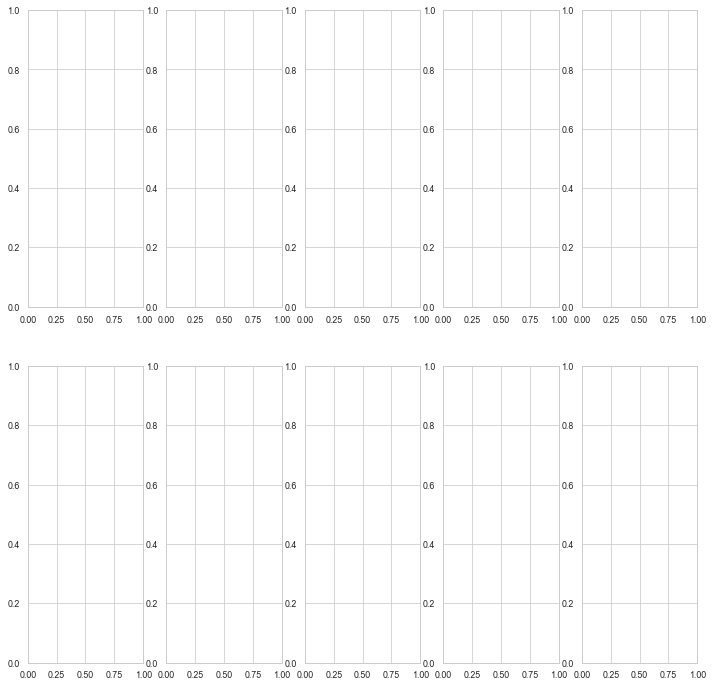

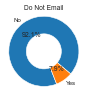

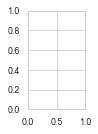

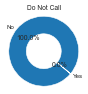

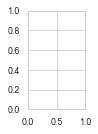

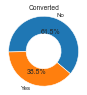

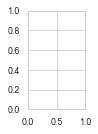

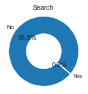

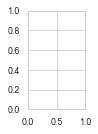

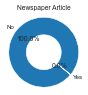

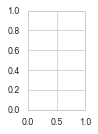

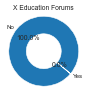

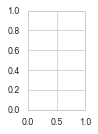

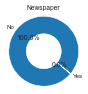

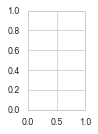

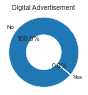

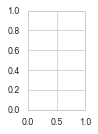

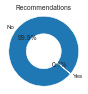

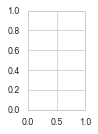

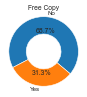

In [472]:
fig, axs = plt.subplots(2, 5, figsize = (12, 12))
axs = axs.flatten()

i = 1
for each_col in col:
    plt.subplot(2, 5, i)
    pieplot(each_col)
    i += 1

  Free Copy  Total Leads   % Values  Converted  Not Converted  Converted %
0        No         6352  68.744589       2531           3821    39.845718
1       Yes         2888  31.255411       1030           1858    35.664820


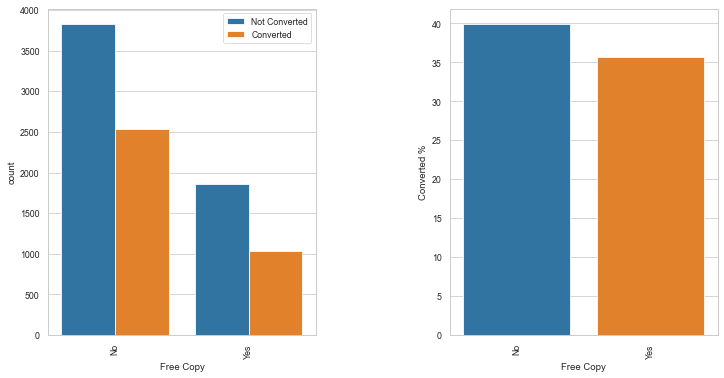

In [473]:
univariate_categorical("Free Copy")

- **Do Not Call**, **Search**, **Newspaper**, **Newspaper Article**, **X Education Forums**, **Digital Advertisement**, and **Recommendations** are the features that we should drop as there are completely one-sided and won't contribute much to our model.
- We will keep **Do Not Email** as the conversion rate differs a lot in the two possible outcomes contrary to the case of **Free Copy** which we will drop for the said reason.

In [474]:
col = [x for x in col if x not in ["Do Not Email", "Converted"]]
col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Recommendations',
 'Free Copy']

In [475]:
lead.drop(col, axis = 1, inplace = True)
len(lead.columns)

10

### Univariate Analysis (NUMERICAL)

In [476]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

In [477]:
numerical_columns = lead.select_dtypes(include=['int', 'float']).columns.to_list()
numerical_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [478]:
numerical_columns.remove("Converted")

#### Col: Total Visits

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

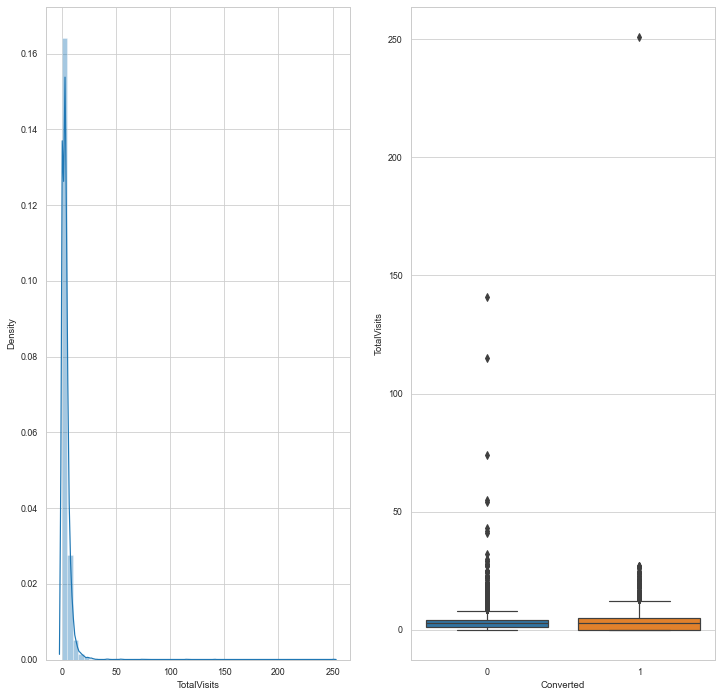

In [479]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(lead["TotalVisits"])

plt.subplot(1, 2, 2)
sns.boxplot(y = lead["TotalVisits"], x = lead["Converted"])

- The distribution of the feature is highly positively skewed.
- Here, outliers can be observed easily.

#### Col: Total Time Spent on Website

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

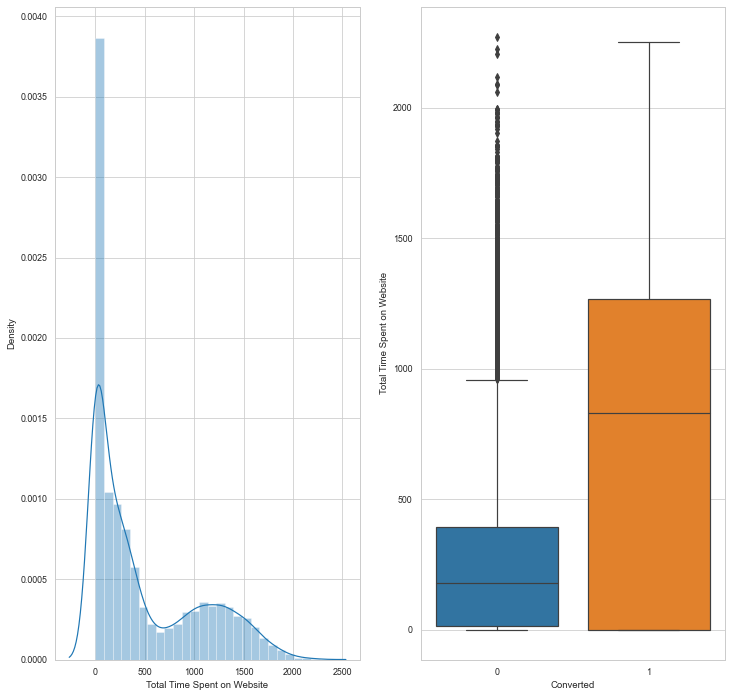

In [480]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(lead["Total Time Spent on Website"])

plt.subplot(1, 2, 2)
sns.boxplot(y = lead["Total Time Spent on Website"], x = lead["Converted"])

- Again the distribution of the feature is highly positively skewed.
- The magnitude of the outliers here are less as compared to the earlier where we had extreme observations.

#### Col: Page Views Per Visit

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

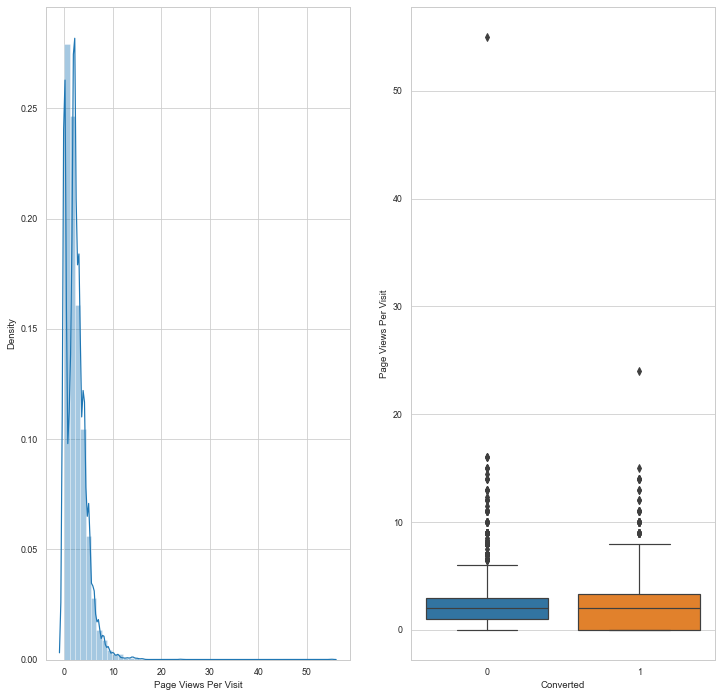

In [481]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(lead["Page Views Per Visit"])

plt.subplot(1, 2, 2)
sns.boxplot(y = lead["Page Views Per Visit"], x = lead["Converted"])

- Again the same nature as earlier can be observed in this feature too.
- Here are some outliers that need to be treated.

### Bivariate Analysis

In [482]:
numerical_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [483]:
lead[numerical_columns]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.00
1,5.0,674,2.50
2,2.0,1532,2.00
3,1.0,305,1.00
4,2.0,1428,1.00
...,...,...,...
9235,8.0,1845,2.67
9236,2.0,238,2.00
9237,2.0,199,2.00
9238,3.0,499,3.00


<Figure size 1440x1440 with 0 Axes>

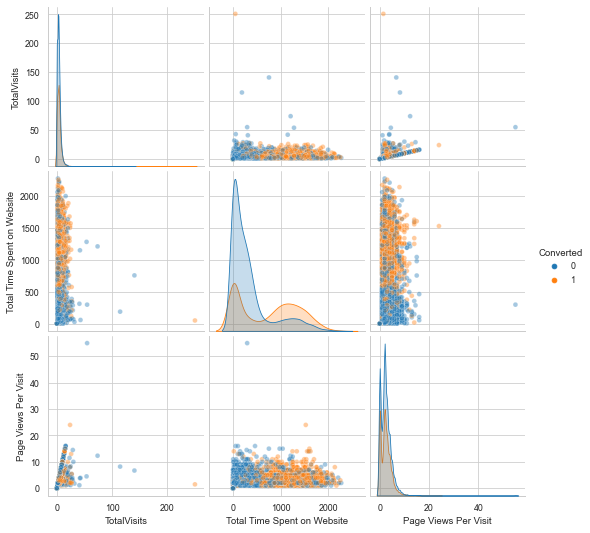

In [484]:
plt.figure(figsize = (20, 20))
sns.pairplot(data = lead, x_vars = numerical_columns, y_vars = numerical_columns, hue = "Converted", kind = "scatter", plot_kws = {"alpha": 0.4})
plt.show()

Data is not normally distributed.

# Data Preparation

## Outliers Treatment

In [485]:
lead.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [486]:
numerical_columns = lead.select_dtypes(include=['int', 'float']).columns.to_list()
numerical_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

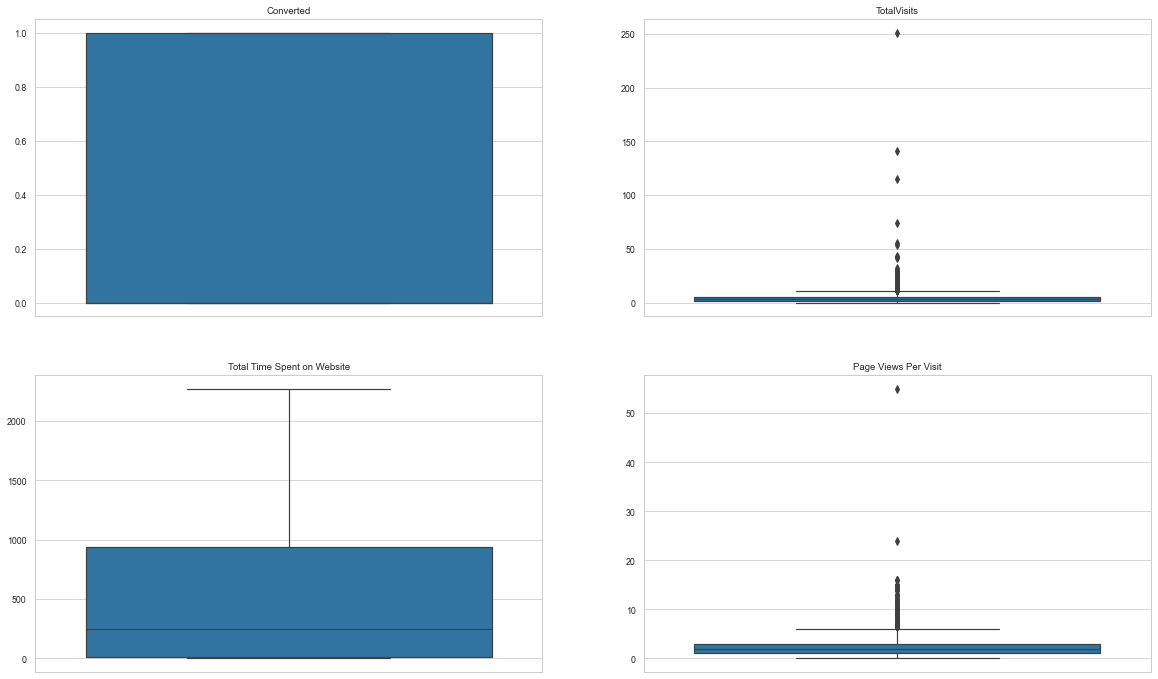

In [487]:
# Plotting graph to visualize and treat outliers

i=1
plt.figure(figsize=[20,12])
for col in numerical_columns:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Since, Logistic Regression is heavily influenced by outliers. Here we treat the outliers nevertheless they represent some true scenario.(Here we are considering any points beyond the 90th percentile as outliers). Let's use 90th-percentile capping to replace the extreme values.


In [488]:
# Capping the data

Q4 = lead["TotalVisits"].quantile(0.95)
print("Total number of outliers that needs to be capped: {}".format(len(lead[lead["TotalVisits"] >= Q4])))
lead.loc[lead["TotalVisits"] >= Q4, "TotalVisits"] = Q4

Q4 = lead["Page Views Per Visit"].quantile(0.95)
print("Total number of outliers that needs to be capped: {}".format(len(lead[lead["Page Views Per Visit"] >= Q4])))
lead.loc[lead["Page Views Per Visit"] >= Q4, "Page Views Per Visit"] = Q4

Total number of outliers that needs to be capped: 467
Total number of outliers that needs to be capped: 604


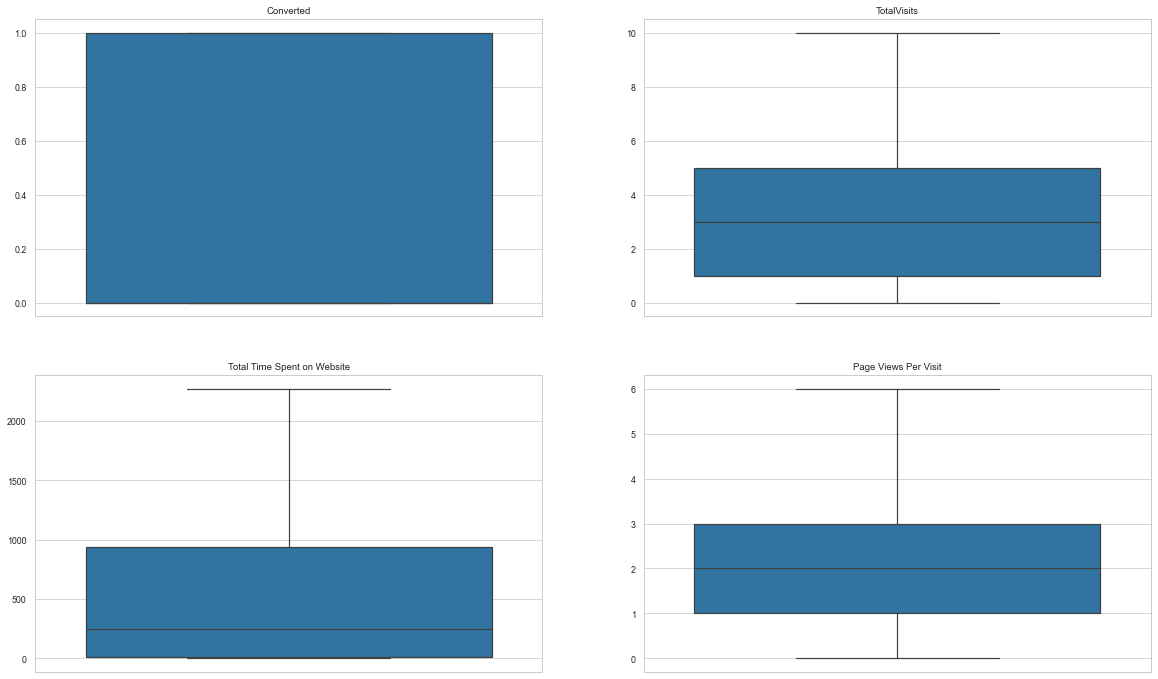

In [489]:
# Again plotting the box plot to see the distribution of the data 

i=1
plt.figure(figsize=[20,12])
for col in numerical_columns:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

The data looks fine enough now.

In [490]:
lead.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


Here, we can see that there is noticable difference in the standard deviation of the data capped. Hopefully, this much difference won't pose much problem to us.

## Converting Binary Categories

In [491]:
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [492]:
# Function to map "Yes" to 1 and "No" to 0

def binary_map(col):
    return col.map({"Yes": 1, "No":0})

In [493]:
lead["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [494]:
lead["Do Not Email"] = binary_map( lead["Do Not Email"] )
lead["Do Not Email"].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [495]:
lead["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

## Dummy Variables

In [496]:
categorical_columns = lead.select_dtypes(exclude=['int', 'float']).columns
categorical_columns 

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Occupation'],
      dtype='object')

In [497]:
dummy1 = pd.get_dummies(lead[categorical_columns], drop_first = True)

lead = pd.concat([lead, dummy1]bank, axis = 1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0


In [498]:
lead.drop(categorical_columns, axis = 1, inplace = True)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

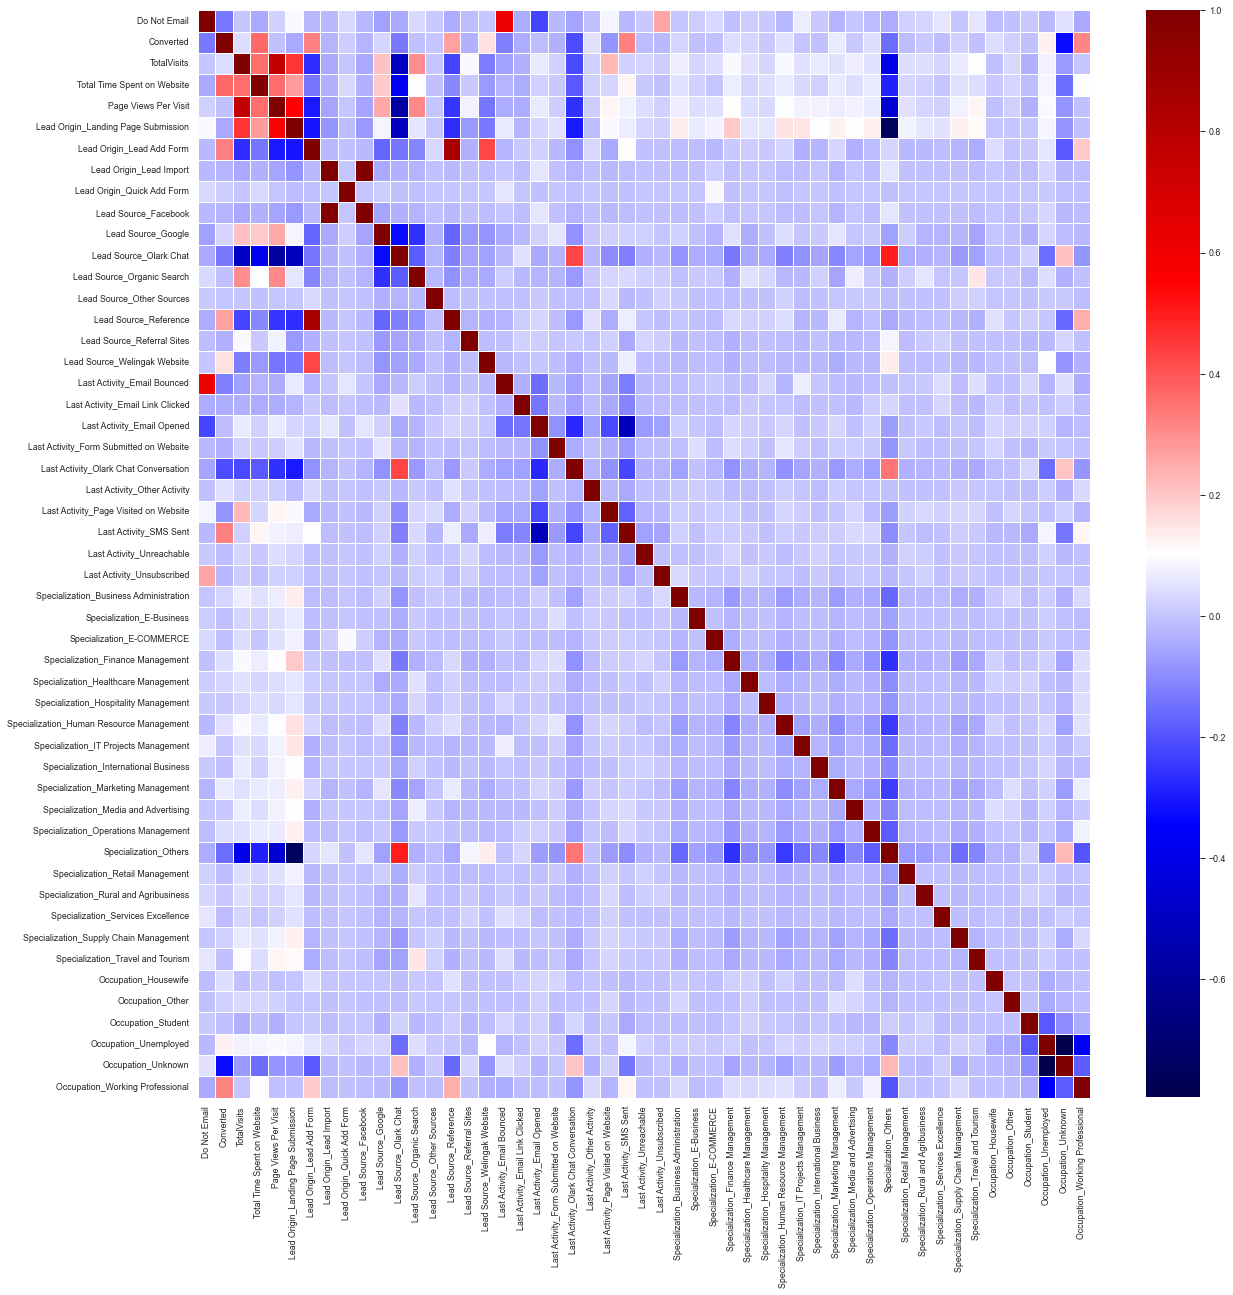

In [499]:
# Visualizing the correlation among features data using heatmap

plt.figure(figsize = (20, 20))
sns.heatmap(lead.corr(), cmap = "seismic", linewidth = 0.5)
plt.show()

Since, there are lots of columns now after one-hot encoding. So, seeing the top correlated variables(in both positive and negative direction.)

In [500]:
corr_lead = lead.corr()
corr_lead = corr_lead.where( np.triu(np.ones(corr_lead.shape), k = 1).astype(np.bool) )
corr_df = corr_lead.unstack().reset_index() 

corr_df.columns = ["Variable 1", "Variable 2", "Correlation"]
corr_df.dropna(subset = ["Correlation"], inplace = True)

corr_df.sort_values(by = "Correlation", ascending = False, inplace = True)

In [501]:
# Looking at 5 highest positive correlations
corr_df.head()

,Variable 1,Variable 2,Correlation
466,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
720,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
206,Page Views Per Visit,TotalVisits,0.767585
867,Last Activity_Email Bounced,Do Not Email,0.618470
259,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423


In [502]:
# Looking at 5 highest neagtive correlations
corr_df.tail()

,Variable 1,Variable 2,Correlation
1243,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
565,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
1994,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
2547,Occupation_Unknown,Occupation_Unemployed,-0.794875


## Train-Test Split

In [503]:
Y = lead["Converted"]
X = lead.drop("Converted", axis = 1)

In [504]:
X.columns.value_counts().sum()

50

In [505]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7,  test_size = 0.3, random_state = 69 )

In [506]:
# Checking the shape of the created Train & Test DFs

print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",Y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",Y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


## Feature Scaling

In [507]:
numerical_columns = lead.select_dtypes(include=['int', 'float']).columns.to_list()
numerical_columns

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [508]:
numerical_columns = [x for x in numerical_columns if x not in ["Converted", "Do Not Email"]]
numerical_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [509]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
8998,0,-0.065248,-0.170087,0.426257,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
579,0,2.468333,-0.714168,2.118841,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5240,0,2.468333,1.001778,1.836744,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1452,0,1.020573,-0.301103,0.426257,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3891,0,0.658633,-0.155530,1.554646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,-0.427188,-0.759659,-0.137938,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4374,0,2.468333,2.142709,0.144159,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8631,0,0.658633,0.748844,1.554646,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4041,1,-0.789128,-0.166448,-0.702133,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [510]:
# Checking if features are scaled or not
X_train[numerical_columns].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,-7.518208e-18,-5.321106e-18,-1.188323e-16
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.151068e+00,-8.943145e-01,-1.266328e+00
25%,-7.891279e-01,-8.729334e-01,-7.021329e-01
50%,-6.524771e-02,-4.430373e-01,-1.379381e-01
75%,6.586325e-01,8.325488e-01,4.262567e-01
max,2.468333e+00,3.239967e+00,2.118841e+00


## RFE for Feature Reduction

In [511]:
# rfecv = RFECV(
#             estimator = LogisticRegression(),
#             min_features_to_select = 5,
#             step = 1,
#             n_jobs = -1,
#             scoring = "roc_auc",
#             cv = 5,
#             )

# _ = rfecv.fit(X_train, Y_train)

# print("Number of optimal features to be included in the model :{arg}".format(arg = X_train.columns[rfecv.support_].value_counts().sum()))

# print("\nThose features are: \n")
# X_train.columns[rfecv.support_]

# lr = LogisticRegression()
# _ = lr.fit(X_train, Y_train)

# print("Training AUC-ROC:", lr.score(X_train, Y_train))
# print("Testing AUC-ROC:",lr.score(scaler.fit_transform(X_test, Y_test))

In [512]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, Y_train)

In [513]:
list( zip(X_train.columns, rfe.support_, rfe.ranking_) )

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other Sources', False, 12),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SM

In [514]:
# Columns included after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Unknown',
       'Occupation_Working Professional'],
      dtype='object')

In [515]:
# Columns excluded after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'S

## Manual Feature Selection

Strategy:
For Manual Feature Reduction, the following methods will be followed in order to reduce the features until we reach reasonable amount of feature count and maintain Sensitivity of the modeal =>80%
- High P-Value
- High VIF
- High negative GLM coefficient

In [516]:
# Function to repeatedly build Logistic regression model and calculate VIF calculation

def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list]
    X_train_sm = sm.add_constant(X_train_local)
    log_model = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial()).fit()
    return(log_model, X_train_sm)

def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif.sort_values(by = "VIF", ascending = False, inplace = True)
    return vif

#### Model 1

In [517]:
features = list(rfe_col)
log_model1, X_train_sm1 = build_logistic_model(features)
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.1
Date:                Tue, 31 Jan 2023   Deviance:                       5148.2
Time:                        18:58:41   Pearson chi2:                 7.39e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4178
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1370      1.108      0.124      0.902      -2.035       2.309
Do Not Email                             -1.2523      0.181     -6.910      0.000      -1.608      -0.897
Total Time Spent on Website               1.1395      0.041     27.873      0.000       1.059       1.220
Lead Origin_Landing Page Submission      -0.9796      0.129     -7.616      0.000      -1.232      -0.728
Lead Origin_Lead Add Form                 2.7972      0.204     13.707      0.000       2.397       3.197
Lead Source_Olark Chat                    1.2459      0.126      9.919      0.000       1.000       1.492
Lead Source_Welingak Website             23.0228   1.28e+04      0.002      0.999   -2.51e+04    2.51e+04
Last Activity_Email Opened                0.9193      0.138      6.666      0.000       0.649       1.190
Last Activity_Olark Chat Conversation    -0.6824      0.213     -3.197      0.001      -1.101      -0.264
Last Activity_Other Activity              1.6356      0.479      3.411      0.001       0.696       2.575
Last Activity_Page Visited on Website     0.5258      0.186      2.830      0.005       0.162       0.890
Last Activity_SMS Sent                    2.1326      0.139     15.306      0.000       1.859       2.406
Last Activity_Unreachable                 0.7642      0.354      2.162      0.031       0.071       1.457
Last Activity_Unsubscribed                1.9387      0.508      3.816      0.000       0.943       2.935
Specialization_Others                    -1.0032      0.124     -8.065      0.000      -1.247      -0.759
Occupation_Housewife                     23.6883   4.42e+04      0.001      1.000   -8.67e+04    8.67e+04
Occupation_Other                         -1.4217      1.323     -1.075      0.283      -4.015       1.171
Occupation_Student                       -1.2575      1.126     -1.116      0.264      -3.465       0.950
Occupation_Unemployed                    -1.1043      1.104     -1.000      0.317      -3.268       1.059
Occupation_Unknown                       -2.2755      1.106     -2.057      0.040      -4.444      -0.107
Occupation_Working Professional           1.1356      1.117      1.016      0.310      -1.055       3.326
=========================================================================================================
"""

In [518]:
calculate_VIF(X_train)

,Features,VIF
47,Occupation_Unemployed,39.56
6,Lead Origin_Lead Import,21.44
8,Lead Source_Facebook,21.39
5,Lead Origin_Lead Add Form,19.96
48,Occupation_Unknown,19.90
13,Lead Source_Reference,16.30
38,Specialization_Others,14.45
18,Last Activity_Email Opened,10.18
4,Lead Origin_Landing Page Submission,8.35
23,Last Activity_SMS Sent,8.05


- Based on the p value, **Occupation_Housewife** not came out to be statistically different from zero and is highly insignificant. Hence, dropping this feature from the model.

#### Model 2

In [519]:
features.remove("Occupation_Housewife")
log_model2, X_train_sm2 = build_logistic_model(features)
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.6
Date:                Tue, 31 Jan 2023   Deviance:                       5151.1
Time:                        18:58:42   Pearson chi2:                 7.39e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1835      0.906      1.306      0.191      -0.592       2.959
Do Not Email                             -1.2510      0.181     -6.903      0.000      -1.606      -0.896
Total Time Spent on Website               1.1395      0.041     27.872      0.000       1.059       1.220
Lead Origin_Landing Page Submission      -0.9734      0.128     -7.577      0.000      -1.225      -0.722
Lead Origin_Lead Add Form                 2.8005      0.204     13.722      0.000       2.400       3.200
Lead Source_Olark Chat                    1.2486      0.126      9.940      0.000       1.002       1.495
Lead Source_Welingak Website             23.0219   1.28e+04      0.002      0.999   -2.51e+04    2.51e+04
Last Activity_Email Opened                0.9243      0.138      6.703      0.000       0.654       1.195
Last Activity_Olark Chat Conversation    -0.6779      0.213     -3.176      0.001      -1.096      -0.260
Last Activity_Other Activity              1.6392      0.479      3.419      0.001       0.699       2.579
Last Activity_Page Visited on Website     0.5243      0.186      2.821      0.005       0.160       0.889
Last Activity_SMS Sent                    2.1358      0.139     15.327      0.000       1.863       2.409
Last Activity_Unreachable                 0.7602      0.355      2.143      0.032       0.065       1.455
Last Activity_Unsubscribed                1.9404      0.508      3.819      0.000       0.945       2.936
Specialization_Others                    -1.0011      0.124     -8.054      0.000      -1.245      -0.757
Occupation_Other                         -2.4756      1.156     -2.141      0.032      -4.742      -0.209
Occupation_Student                       -2.3124      0.923     -2.505      0.012      -4.122      -0.503
Occupation_Unemployed                    -2.1592      0.895     -2.411      0.016      -3.914      -0.404
Occupation_Unknown                       -3.3304      0.898     -3.707      0.000      -5.091      -1.570
Occupation_Working Professional           0.0807      0.912      0.089      0.929      -1.707       1.869
=========================================================================================================
"""

In [520]:
calculate_VIF(X_train[features])

,Features,VIF
16,Occupation_Unemployed,12.65
2,Lead Origin_Landing Page Submission,7.14
17,Occupation_Unknown,7.01
6,Last Activity_Email Opened,4.63
13,Specialization_Others,4.63
10,Last Activity_SMS Sent,3.71
18,Occupation_Working Professional,2.34
4,Lead Source_Olark Chat,2.33
7,Last Activity_Olark Chat Conversation,2.24
3,Lead Origin_Lead Add Form,1.93


- Based on the p value, **Lead Source_Welingak Website** not came out to be statistically different from zero and is highly insignificant. Hence, dropping this feature from the model.

#### Model 3

In [521]:
features.remove("Lead Source_Welingak Website")
log_model3, X_train_sm3 = build_logistic_model(features)
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.0
Date:                Tue, 31 Jan 2023   Deviance:                       5181.9
Time:                        18:58:43   Pearson chi2:                 8.15e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4147
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1082      0.905      1.224      0.221      -0.666       2.882
Do Not Email                             -1.2603      0.181     -6.972      0.000      -1.615      -0.906
Total Time Spent on Website               1.1397      0.041     27.866      0.000       1.060       1.220
Lead Origin_Landing Page Submission      -0.9165      0.128     -7.167      0.000      -1.167      -0.666
Lead Origin_Lead Add Form                 3.2357      0.197     16.400      0.000       2.849       3.622
Lead Source_Olark Chat                    1.2431      0.125      9.922      0.000       0.998       1.489
Last Activity_Email Opened                0.9376      0.138      6.792      0.000       0.667       1.208
Last Activity_Olark Chat Conversation    -0.6691      0.213     -3.136      0.002      -1.087      -0.251
Last Activity_Other Activity              1.6289      0.482      3.377      0.001       0.684       2.574
Last Activity_Page Visited on Website     0.5344      0.186      2.873      0.004       0.170       0.899
Last Activity_SMS Sent                    2.1477      0.139     15.396      0.000       1.874       2.421
Last Activity_Unreachable                 0.7557      0.357      2.117      0.034       0.056       1.455
Last Activity_Unsubscribed                1.9339      0.511      3.784      0.000       0.932       2.936
Specialization_Others                    -0.9235      0.124     -7.466      0.000      -1.166      -0.681
Occupation_Other                         -2.4687      1.159     -2.130      0.033      -4.740      -0.197
Occupation_Student                       -2.3267      0.923     -2.521      0.012      -4.136      -0.518
Occupation_Unemployed                    -2.1502      0.895     -2.403      0.016      -3.904      -0.396
Occupation_Unknown                       -3.3290      0.898     -3.708      0.000      -5.089      -1.569
Occupation_Working Professional           0.0812      0.912      0.089      0.929      -1.706       1.868
=========================================================================================================
"""

In [522]:
calculate_VIF(X_train[features])

,Features,VIF
15,Occupation_Unemployed,12.50
2,Lead Origin_Landing Page Submission,7.02
16,Occupation_Unknown,6.90
5,Last Activity_Email Opened,4.63
12,Specialization_Others,4.46
9,Last Activity_SMS Sent,3.70
4,Lead Source_Olark Chat,2.33
17,Occupation_Working Professional,2.28
6,Last Activity_Olark Chat Conversation,2.24
3,Lead Origin_Lead Add Form,1.61


- Based on the p value, **Occupation_Working Professional** not came out to be statistically different from zero and is highly insignificant. Hence, dropping this feature from the model.

#### Model 4

In [523]:
features.remove("Occupation_Working Professional")
log_model4, X_train_sm4 = build_logistic_model(features)
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.0
Date:                Tue, 31 Jan 2023   Deviance:                       5181.9
Time:                        18:58:43   Pearson chi2:                 8.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4147
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1861      0.235      5.052      0.000       0.726       1.646
Do Not Email                             -1.2602      0.181     -6.972      0.000      -1.614      -0.906
Total Time Spent on Website               1.1398      0.041     27.870      0.000       1.060       1.220
Lead Origin_Landing Page Submission      -0.9165      0.128     -7.167      0.000      -1.167      -0.666
Lead Origin_Lead Add Form                 3.2359      0.197     16.402      0.000       2.849       3.623
Lead Source_Olark Chat                    1.2433      0.125      9.925      0.000       0.998       1.489
Last Activity_Email Opened                0.9377      0.138      6.792      0.000       0.667       1.208
Last Activity_Olark Chat Conversation    -0.6688      0.213     -3.135      0.002      -1.087      -0.251
Last Activity_Other Activity              1.6292      0.482      3.378      0.001       0.684       2.574
Last Activity_Page Visited on Website     0.5343      0.186      2.873      0.004       0.170       0.899
Last Activity_SMS Sent                    2.1479      0.139     15.400      0.000       1.875       2.421
Last Activity_Unreachable                 0.7556      0.357      2.116      0.034       0.056       1.455
Last Activity_Unsubscribed                1.9339      0.511      3.784      0.000       0.932       2.936
Specialization_Others                    -0.9236      0.124     -7.468      0.000      -1.166      -0.681
Occupation_Other                         -2.5468      0.759     -3.356      0.001      -4.034      -1.059
Occupation_Student                       -2.4047      0.291     -8.264      0.000      -2.975      -1.834
Occupation_Unemployed                    -2.2282      0.184    -12.132      0.000      -2.588      -1.868
Occupation_Unknown                       -3.4070      0.197    -17.283      0.000      -3.793      -3.021
=========================================================================================================
"""

In [524]:
calculate_VIF(X_train[features])

,Features,VIF
15,Occupation_Unemployed,6.60
2,Lead Origin_Landing Page Submission,5.54
16,Occupation_Unknown,4.18
12,Specialization_Others,4.02
5,Last Activity_Email Opened,3.48
9,Last Activity_SMS Sent,2.79
4,Lead Source_Olark Chat,2.22
6,Last Activity_Olark Chat Conversation,1.98
8,Last Activity_Page Visited on Website,1.43
3,Lead Origin_Lead Add Form,1.40


- Now, as all the variables are statistcially significant at 5% l.o.s. Let's remove the variable **Occupation_Unemployed** as it has highest VIF and may cause the problem of multicollinearity.

#### Model 5

In [525]:
features.remove("Occupation_Unemployed")
log_model5, X_train_sm5 = build_logistic_model(features)
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.9
Date:                Tue, 31 Jan 2023   Deviance:                       5381.7
Time:                        18:58:43   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3964
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6513      0.164     -3.963      0.000      -0.973      -0.329
Do Not Email                             -1.2893      0.177     -7.282      0.000      -1.636      -0.942
Total Time Spent on Website               1.1473      0.040     28.548      0.000       1.069       1.226
Lead Origin_Landing Page Submission      -1.1081      0.124     -8.934      0.000      -1.351      -0.865
Lead Origin_Lead Add Form                 3.2592      0.194     16.775      0.000       2.878       3.640
Lead Source_Olark Chat                    1.2331      0.123      9.988      0.000       0.991       1.475
Last Activity_Email Opened                0.9253      0.134      6.890      0.000       0.662       1.189
Last Activity_Olark Chat Conversation    -0.6398      0.207     -3.085      0.002      -1.046      -0.233
Last Activity_Other Activity              1.6342      0.467      3.499      0.000       0.719       2.550
Last Activity_Page Visited on Website     0.4921      0.182      2.709      0.007       0.136       0.848
Last Activity_SMS Sent                    2.1273      0.136     15.665      0.000       1.861       2.393
Last Activity_Unreachable                 0.6871      0.348      1.974      0.048       0.005       1.369
Last Activity_Unsubscribed                1.9497      0.487      4.002      0.000       0.995       2.905
Specialization_Others                    -1.2233      0.121    -10.132      0.000      -1.460      -0.987
Occupation_Other                         -0.5955      0.748     -0.796      0.426      -2.062       0.871
Occupation_Student                       -0.3527      0.236     -1.493      0.136      -0.816       0.110
Occupation_Unknown                       -1.3207      0.088    -14.968      0.000      -1.494      -1.148
=========================================================================================================
"""

In [526]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.63
5,Last Activity_Email Opened,2.92
12,Specialization_Others,2.85
9,Last Activity_SMS Sent,2.47
4,Lead Source_Olark Chat,2.19
6,Last Activity_Olark Chat Conversation,1.87
15,Occupation_Unknown,1.61
3,Lead Origin_Lead Add Form,1.38
8,Last Activity_Page Visited on Website,1.34
0,Do Not Email,1.26


- Now, removing **Occupation_Other** as it is not significant at 5% l.o.s.

#### Model 6

In [527]:
features.remove("Occupation_Other")
log_model6, X_train_sm6 = build_logistic_model(features)
log_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.2
Date:                Tue, 31 Jan 2023   Deviance:                       5382.3
Time:                        18:58:43   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6551      0.164     -3.988      0.000      -0.977      -0.333
Do Not Email                             -1.2887      0.177     -7.280      0.000      -1.636      -0.942
Total Time Spent on Website               1.1465      0.040     28.545      0.000       1.068       1.225
Lead Origin_Landing Page Submission      -1.1040      0.124     -8.910      0.000      -1.347      -0.861
Lead Origin_Lead Add Form                 3.2598      0.194     16.779      0.000       2.879       3.641
Lead Source_Olark Chat                    1.2329      0.123      9.989      0.000       0.991       1.475
Last Activity_Email Opened                0.9233      0.134      6.877      0.000       0.660       1.186
Last Activity_Olark Chat Conversation    -0.6438      0.207     -3.105      0.002      -1.050      -0.237
Last Activity_Other Activity              1.6344      0.467      3.500      0.000       0.719       2.550
Last Activity_Page Visited on Website     0.4883      0.182      2.689      0.007       0.132       0.844
Last Activity_SMS Sent                    2.1267      0.136     15.665      0.000       1.861       2.393
Last Activity_Unreachable                 0.6871      0.348      1.974      0.048       0.005       1.369
Last Activity_Unsubscribed                1.9487      0.487      4.000      0.000       0.994       2.903
Specialization_Others                    -1.2189      0.121    -10.109      0.000      -1.455      -0.983
Occupation_Student                       -0.3506      0.236     -1.484      0.138      -0.814       0.112
Occupation_Unknown                       -1.3192      0.088    -14.956      0.000      -1.492      -1.146
=========================================================================================================
"""

In [528]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.63
5,Last Activity_Email Opened,2.92
12,Specialization_Others,2.85
9,Last Activity_SMS Sent,2.47
4,Lead Source_Olark Chat,2.19
6,Last Activity_Olark Chat Conversation,1.86
14,Occupation_Unknown,1.61
3,Lead Origin_Lead Add Form,1.38
8,Last Activity_Page Visited on Website,1.34
0,Do Not Email,1.26


- Now, removing **Occupation_Student** as it is not significant at 5% l.o.s.

#### Model 7

In [529]:
features.remove("Occupation_Student")
log_model7, X_train_sm7 = build_logistic_model(features)
log_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.3
Date:                Tue, 31 Jan 2023   Deviance:                       5384.6
Time:                        18:58:43   Pearson chi2:                 6.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6643      0.164     -4.048      0.000      -0.986      -0.343
Do Not Email                             -1.2875      0.177     -7.281      0.000      -1.634      -0.941
Total Time Spent on Website               1.1455      0.040     28.541      0.000       1.067       1.224
Lead Origin_Landing Page Submission      -1.1049      0.124     -8.925      0.000      -1.348      -0.862
Lead Origin_Lead Add Form                 3.2570      0.194     16.764      0.000       2.876       3.638
Lead Source_Olark Chat                    1.2264      0.123      9.948      0.000       0.985       1.468
Last Activity_Email Opened                0.9237      0.134      6.883      0.000       0.661       1.187
Last Activity_Olark Chat Conversation    -0.6495      0.207     -3.134      0.002      -1.056      -0.243
Last Activity_Other Activity              1.6452      0.467      3.525      0.000       0.730       2.560
Last Activity_Page Visited on Website     0.4863      0.181      2.679      0.007       0.131       0.842
Last Activity_SMS Sent                    2.1314      0.136     15.706      0.000       1.865       2.397
Last Activity_Unreachable                 0.6965      0.348      2.003      0.045       0.015       1.378
Last Activity_Unsubscribed                1.9542      0.487      4.017      0.000       1.001       2.908
Specialization_Others                    -1.2196      0.120    -10.130      0.000      -1.456      -0.984
Occupation_Unknown                       -1.3089      0.088    -14.884      0.000      -1.481      -1.137
=========================================================================================================
"""

In [530]:
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.62
5,Last Activity_Email Opened,2.92
12,Specialization_Others,2.84
9,Last Activity_SMS Sent,2.47
4,Lead Source_Olark Chat,2.18
6,Last Activity_Olark Chat Conversation,1.86
13,Occupation_Unknown,1.59
3,Lead Origin_Lead Add Form,1.38
8,Last Activity_Page Visited on Website,1.34
0,Do Not Email,1.26


Let's remove the variable **Lead Origin_Landing Page Submission** as it has highest VIF and may cause the problem of multicollinearity.

#### Model 8

In [531]:
features.remove("Lead Origin_Landing Page Submission")
log_model8, X_train_sm8 = build_logistic_model(features)
log_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.7
Date:                Tue, 31 Jan 2023   Deviance:                       5467.5
Time:                        18:58:43   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6072      0.127    -12.688      0.000      -1.855      -1.359
Do Not Email                             -1.3475      0.173     -7.771      0.000      -1.687      -1.008
Total Time Spent on Website               1.1631      0.040     29.071      0.000       1.085       1.242
Lead Origin_Lead Add Form                 3.8554      0.182     21.200      0.000       3.499       4.212
Lead Source_Olark Chat                    1.6130      0.116     13.929      0.000       1.386       1.840
Last Activity_Email Opened                0.9186      0.133      6.911      0.000       0.658       1.179
Last Activity_Olark Chat Conversation    -0.5789      0.204     -2.833      0.005      -0.979      -0.178
Last Activity_Other Activity              1.6923      0.467      3.626      0.000       0.778       2.607
Last Activity_Page Visited on Website     0.4597      0.180      2.557      0.011       0.107       0.812
Last Activity_SMS Sent                    2.0979      0.134     15.622      0.000       1.835       2.361
Last Activity_Unreachable                 0.6659      0.343      1.940      0.052      -0.007       1.339
Last Activity_Unsubscribed                1.9187      0.487      3.939      0.000       0.964       2.873
Specialization_Others                    -0.4922      0.086     -5.708      0.000      -0.661      -0.323
Occupation_Unknown                       -1.3654      0.087    -15.641      0.000      -1.537      -1.194
=========================================================================================================
"""

In [532]:
calculate_VIF(X_train[features])

,Features,VIF
11,Specialization_Others,2.18
3,Lead Source_Olark Chat,2.06
5,Last Activity_Olark Chat Conversation,1.58
12,Occupation_Unknown,1.53
4,Last Activity_Email Opened,1.38
8,Last Activity_SMS Sent,1.29
1,Total Time Spent on Website,1.26
2,Lead Origin_Lead Add Form,1.23
0,Do Not Email,1.14
7,Last Activity_Page Visited on Website,1.08


- Now as all the features has VIFs less than 3 and all of them are statistcally significant at 5% los (except one which is a boundary line and won't bother much)

- All the features have significant P Values and VIF under 5. So next, we will look into WoE and Coefficient value to remove parameters.

In [533]:
# def calculate_woe_iv(dataset, feature, target):
#     lst = []
#     for i in range(dataset[feature].nunique()):
#         val = list(dataset[feature].unique())[i]
#         lst.append({
#             'Value': val,
#             'All': dataset[dataset[feature] == val].count()[feature],
#             'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
#             'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
#         })
        
#     dset = pd.DataFrame(lst)
#     dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
#     dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
#     dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
#     dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
#     dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
#     iv = dset['IV'].sum()
    
#     dset = dset.sort_values(by='WoE')
    
#     return dset, iv

In [534]:
# for col in lead.columns:
#     if col in features:
#         df, iv = calculate_woe_iv(lead, col, 'Converted')
#         print('IV score of column : ',col, " is ", round(iv,4))

# Model Evaluation: Train Dataset

In [535]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

### Predicted Prob Calcualtion

In [536]:
# Getting the predicted values on the train set
y_train_pred = log_model8.predict(X_train_sm8)
y_train_pred[:10]

8998    0.450352
579     0.029059
5240    0.839696
1452    0.261385
3891    0.576848
4618    0.485338
6559    0.861453
2382    0.107028
3673    0.276784
3804    0.030151
dtype: float64

In [537]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"Converted_IND": Y_train.values, "Converted_Prob": y_train_pred})
y_train_pred_final["Prospect_IND"] = Y_train.index

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
8998,0,0.450352,8998
579,0,0.029059,579
5240,1,0.839696,5240
1452,0,0.261385,1452
3891,0,0.576848,3891


In [538]:
# Finding the optimal decision boundary

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8998,0,0.450352,8998,1,1,1,1,1,0,0,0,0,0
579,0,0.029059,579,1,0,0,0,0,0,0,0,0,0
5240,1,0.839696,5240,1,1,1,1,1,1,1,1,1,0
1452,0,0.261385,1452,1,1,1,0,0,0,0,0,0,0
3891,0,0.576848,3891,1,1,1,1,1,1,0,0,0,0


In [539]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ["Prob", "Accuracy", "Sensi", "Speci", "Precision", "Recall"] )

num = [float(x)/10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted_IND"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    
    cutoff_df.loc[i,] = [i,  accuracy, sensi, speci, prec[1], rec[1]]
cutoff_df
    

,Prob,Accuracy,Sensi,Speci,Precision,Recall
0.0,0.0,0.389301,1.0,0.0,1.0,0.0
0.1,0.1,0.611936,0.983717,0.374937,0.500809,0.983717
0.2,0.2,0.74397,0.917792,0.633165,0.614628,0.917792
0.3,0.3,0.790043,0.875298,0.735696,0.678571,0.875298
0.4,0.4,0.807823,0.791104,0.818481,0.735327,0.791104
0.5,0.5,0.807359,0.704925,0.872658,0.779192,0.704925
0.6,0.6,0.797464,0.623908,0.908101,0.812306,0.623908
0.7,0.7,0.774428,0.5139,0.940506,0.846305,0.5139
0.8,0.8,0.740569,0.396346,0.96,0.863322,0.396346
0.9,0.9,0.678108,0.198967,0.983544,0.885159,0.198967


<Figure size 1296x576 with 0 Axes>

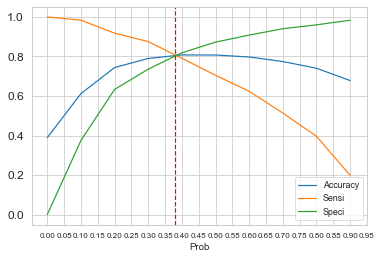

In [540]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))

cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.38, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

- From the graph, 0.38 seems to be an ideal decision boundary.

In [541]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1
8998,0,0.450352,8998,1
579,0,0.029059,579,0
5240,1,0.839696,5240,1
1452,0,0.261385,1452,0
3891,0,0.576848,3891,1


### Confusion Matrix

In [542]:
def draw_cm( actual, predicted, cmap):
    # Calculate the confusion matrix
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.show()

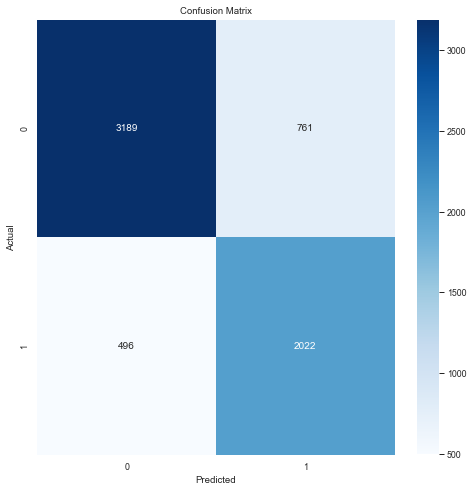

In [543]:
# Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'], "GnBu")

In [544]:
# Performance Metrics 
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.57 %
Model Sensitivity value is           :  80.3 %
Model Specificity value is           :  80.73 %
Model Precision value is             :  72.66 %
Model Recall value is                :  80.3 %
Model True Positive Rate (TPR)       :  80.3 %
Model False Positive Rate (FPR)      :  19.27 %
Model Poitive Prediction Value is    :  72.66 %
Model Negative Prediction value is   :  86.54 %


In [545]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3950
           1       0.73      0.80      0.76      2518

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.81      0.81      0.81      6468



# ROC CURVE

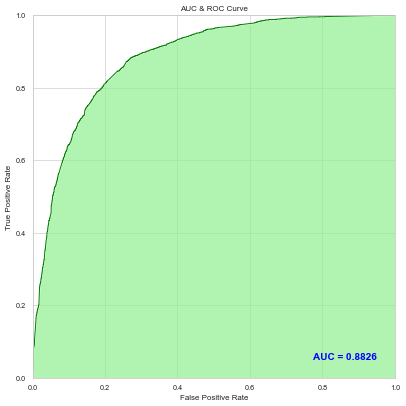

In [546]:
# Plotting the ROC curve 

auc = metrics.roc_auc_score( y_train_pred_final["Converted_IND"], y_train_pred_final["Converted_Prob"])

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( y_train_pred_final["Converted_IND"], y_train_pred_final["Converted_Prob"])

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Precision Recall Trade-off

In [547]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted_IND"], y_train_pred_final["Converted_Prob"])

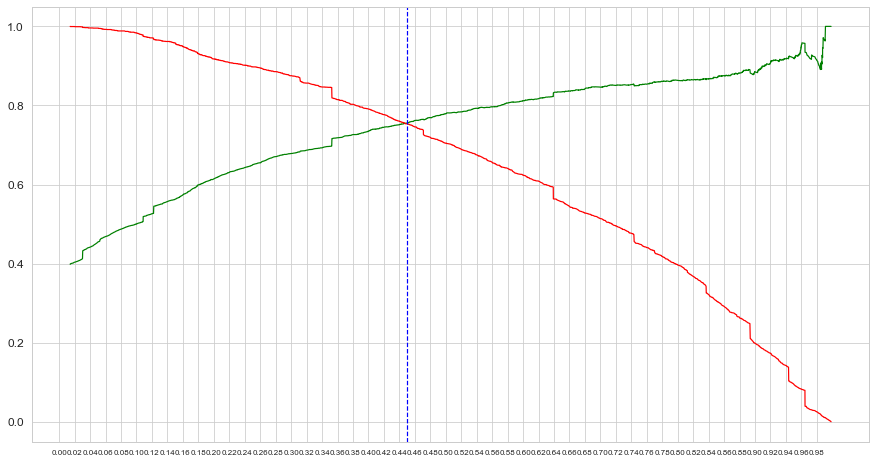

In [548]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.45, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

In [549]:
# Plotting the train datdset again with 0.45 as decision boundary
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x : 1 if x > 0.45 else 0)
y_train_pred_final

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,final_predicted_2
8998,0,0.450352,8998,1,1
579,0,0.029059,579,0,0
5240,1,0.839696,5240,1,1
1452,0,0.261385,1452,0,0
3891,0,0.576848,3891,1,1
...,...,...,...,...,...
9225,0,0.021077,9225,0,0
4374,1,0.858603,4374,1,1
8631,0,0.704663,8631,1,1
4041,0,0.041159,4041,0,0


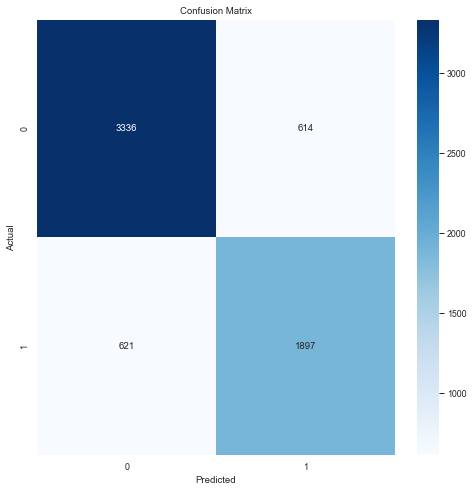

In [550]:
# Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], "GnBu")

In [551]:
# Performance Metrics
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.91 %
Model Sensitivity value is           :  75.34 %
Model Specificity value is           :  84.46 %
Model Precision value is             :  75.55 %
Model Recall value is                :  75.34 %
Model True Positive Rate (TPR)       :  75.34 %
Model False Positive Rate (FPR)      :  15.54 %
Model Poitive Prediction Value is    :  75.55 %
Model Negative Prediction value is   :  84.31 %


In [552]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3950
           1       0.76      0.75      0.75      2518

    accuracy                           0.81      6468
   macro avg       0.80      0.80      0.80      6468
weighted avg       0.81      0.81      0.81      6468



After analyzing the performance metrics, we can see using the earlier decision boundary was more helpful.

# Model Evaluation: Test Dataset

In [553]:
# Scaling the test dataset
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

7777   -1.151068
5441    0.296692
5581   -1.151068
2012   -0.427188
7538   -0.427188
          ...   
1400   -0.427188
4874   -0.065248
9163   -0.427188
8398    2.468333
8366   -0.065248
Name: TotalVisits, Length: 2772, dtype: float64

In [561]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
7777,0,-1.151068,-0.894315,-1.266328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5441,0,0.296692,0.439501,0.990451,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5581,0,-1.151068,-0.894315,-1.266328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2012,0,-0.427188,0.956286,-0.137938,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7538,0,-0.427188,1.671415,-0.137938,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [562]:
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Others,Occupation_Unknown
7777,0,-0.894315,0,1,0,1,0,0,0,0,0,1,0
5441,0,0.439501,0,0,0,1,0,0,0,0,0,1,0
5581,0,-0.894315,0,1,0,1,0,0,0,0,0,0,0
2012,0,0.956286,0,0,1,0,0,0,0,0,0,1,0
7538,0,1.671415,0,0,1,0,0,0,0,0,0,0,0


In [563]:
# Adding Constant Value

X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Occupation_Unknown'],
      dtype='object')

In [564]:
# Predicting the final test model

y_test_pred = log_model8.predict(X_test_sm)

In [566]:
y_test_pred

7777    0.108561
5441    0.102747
5581    0.166123
2012    0.482903
7538    0.778259
          ...   
1400    0.769431
4874    0.196545
9163    0.371901
8398    0.900586
8366    0.924306
Length: 2772, dtype: float64

In [567]:
# Converting y_pred to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
7777,0.108561
5441,0.102747
5581,0.166123
2012,0.482903
7538,0.778259


In [571]:
Y_test = pd.DataFrame(Y_test)
Y_test.head()

,Converted
7777,0
5441,1
5581,0
2012,1
7538,0


In [573]:
Y_test["Prospect_IND"] = Y_test.index

y_test_pred.reset_index(drop = True, inplace = True)
Y_test.reset_index(drop = True, inplace = True)

In [574]:
y_pred_final = pd.concat((Y_test, y_test_pred), axis = 1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,0,7777,0.108561
1,1,5441,0.102747
2,0,5581,0.166123
3,1,2012,0.482903
4,0,7538,0.778259


In [575]:
# Renaming the columns

y_pred_final = y_pred_final.rename(columns = {0: "Converted_Prob", "Converted": "Converted_IND"})

In [576]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(["Prospect_IND", "Converted_IND", "Converted_Prob"], axis = 1)
y_pred_final

,Prospect_IND,Converted_IND,Converted_Prob
0,7777,0,0.108561
1,5441,1,0.102747
2,5581,0,0.166123
3,2012,1,0.482903
4,7538,0,0.778259
...,...,...,...
2767,1400,0,0.769431
2768,4874,0,0.196545
2769,9163,0,0.371901
2770,8398,0,0.900586


In [599]:
y_pred_final["final_predicted"] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,7777,0,0.108561,0
1,5441,1,0.102747,0
2,5581,0,0.166123,0
3,2012,1,0.482903,1
4,7538,0,0.778259,1


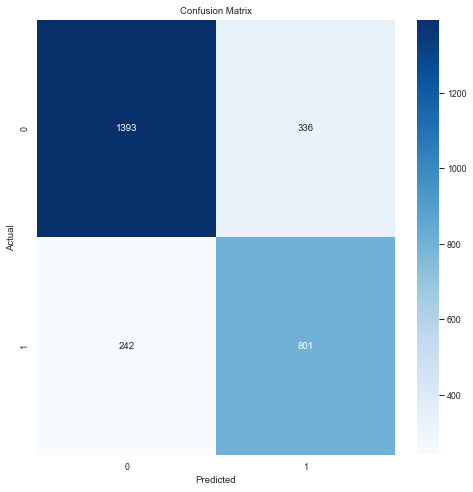

In [600]:
# Plotting the Confusion Matrix
draw_cm( y_pred_final["Converted_IND"], y_pred_final["final_predicted"], "GnBu")

In [602]:
# Performance Metrices

conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Model Accuracy value is              :  79.15 %
Model Sensitivity value is           :  76.8 %
Model Specificity value is           :  80.57 %
Model Precision value is             :  70.45 %
Model Recall value is                :  76.8 %
Model True Positive Rate (TPR)       :  76.8 %
Model False Positive Rate (FPR)      :  19.43 %
Model Poitive Prediction Value is    :  70.45 %
Model Negative Prediction value is   :  85.2 %


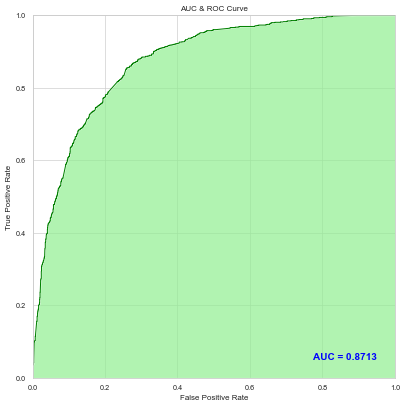

In [603]:
# Plotting AUC Curve

auc = metrics.roc_auc_score( y_pred_final["Converted_IND"], y_pred_final["Converted_Prob"])

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( y_pred_final["Converted_IND"], y_pred_final["Converted_Prob"])

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The AUC value is 0.8713 which is quite good as a classifier.

In [604]:
# Performance Metrices Summarized

print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1729
           1       0.70      0.77      0.73      1043

    accuracy                           0.79      2772
   macro avg       0.78      0.79      0.78      2772
weighted avg       0.80      0.79      0.79      2772



In [605]:
# Assigning leads score (out of 100) based on our model

y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
382,6712,1,0.998545,1,99
1683,6565,1,0.997343,1,99
1391,739,1,0.997158,1,99
1968,2594,1,0.997080,1,99
1341,2656,1,0.996888,1,99
...,...,...,...,...,...
712,3545,0,0.004904,0,0
1396,976,0,0.003449,0,0
2376,885,0,0.003449,0,0
1025,4883,0,0.003224,0,0


# Conclusion

Using some threshold, one can classify out potential leads based on the score provided by our model. More the score, more is the lead convresion probability.

# Random Forest Model

Let's fit a random forest to see how it is performing as a classifier.

In [607]:
from sklearn.ensemble import RandomForestClassifier

In [610]:
# Reading data
from tkinter import *
from tkinter import filedialog
filepath = filedialog.askopenfilename()
lead1 = pd.read_csv(filepath)

lead1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
